<a href="https://colab.research.google.com/github/uomerozkaya/WorldHappinesReportAnalysis/blob/main/WorldHappinessReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-cp37-none-any.whl size=5429 sha256=8e34578fb78fc3b873bff1f156d4f9bef18341e0822288a9423d25472a48c018
  Stored in directory: /root/.cache/pip/wheels/cf/3c/75/8c09dbf7cd6b320b69a6bc679fd111abd1139866c722b1476b
Successfully built bubbly


In [ ]:
# for some basic operations
import numpy as np 
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

# for providing the path
import os
#print(os.listdir("../input"))

# about data2021


Region.indicator - Region (10 Regions)

Ladder.score - Life evaluation score

Logged.GDP.per.capita - Extent to which GDP contributes to the calculation of the Ladder score

Healthy Life Expectancy - Healthy life expectancies at birth based on the data extracted from the World Health Organisation (WHO) data repository

Social support - Defined as having someone to count on in times of trouble (ranked from 0 to 1)

Freedom to make life choices - Defined as the national average of responses to the Gall-WorldPoll question (“Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”)

Generosity - National average of responses to the question - “Have you donated money to a charity in the past month?”

Perception of corruption - National average of responses to the questions (“Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?” )

## Information of data 2021

In [ ]:
data2021 = pd.read_csv('/content/drive/MyDrive/world-happiness-report-2021.csv')
datawh = pd.read_csv('/content/drive/MyDrive/world-happiness-report.csv')
data2021

Country name  ... Dystopia + residual
0        Finland  ...               3.253
1        Denmark  ...               2.868
2    Switzerland  ...               2.839
3        Iceland  ...               2.967
4    Netherlands  ...               2.798
..           ...  ...                 ...
144      Lesotho  ...               1.800
145     Botswana  ...               0.648
146       Rwanda  ...               1.095
147     Zimbabwe  ...               1.205
148  Afghanistan  ...               1.895

[149 rows x 20 columns]

In [ ]:
data2021.tail()

Country name  ... Dystopia + residual
144      Lesotho  ...               1.800
145     Botswana  ...               0.648
146       Rwanda  ...               1.095
147     Zimbabwe  ...               1.205
148  Afghanistan  ...               1.895

[5 rows x 20 columns]

In [ ]:
data2021.head()

Country name  ... Dystopia + residual
0      Finland  ...               3.253
1      Denmark  ...               2.868
2  Switzerland  ...               2.839
3      Iceland  ...               2.967
4  Netherlands  ...               2.798

[5 rows x 20 columns]

In [ ]:
data2021.describe()

Ladder score  ...  Dystopia + residual
count    149.000000  ...           149.000000
mean       5.532839  ...             2.430329
std        1.073924  ...             0.537645
min        2.523000  ...             0.648000
25%        4.852000  ...             2.138000
50%        5.534000  ...             2.509000
75%        6.255000  ...             2.794000
max        7.842000  ...             3.482000

[8 rows x 18 columns]

In [ ]:
data2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [ ]:
data2021.shape

(149, 20)

In [ ]:
data2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

## Distribution of regions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



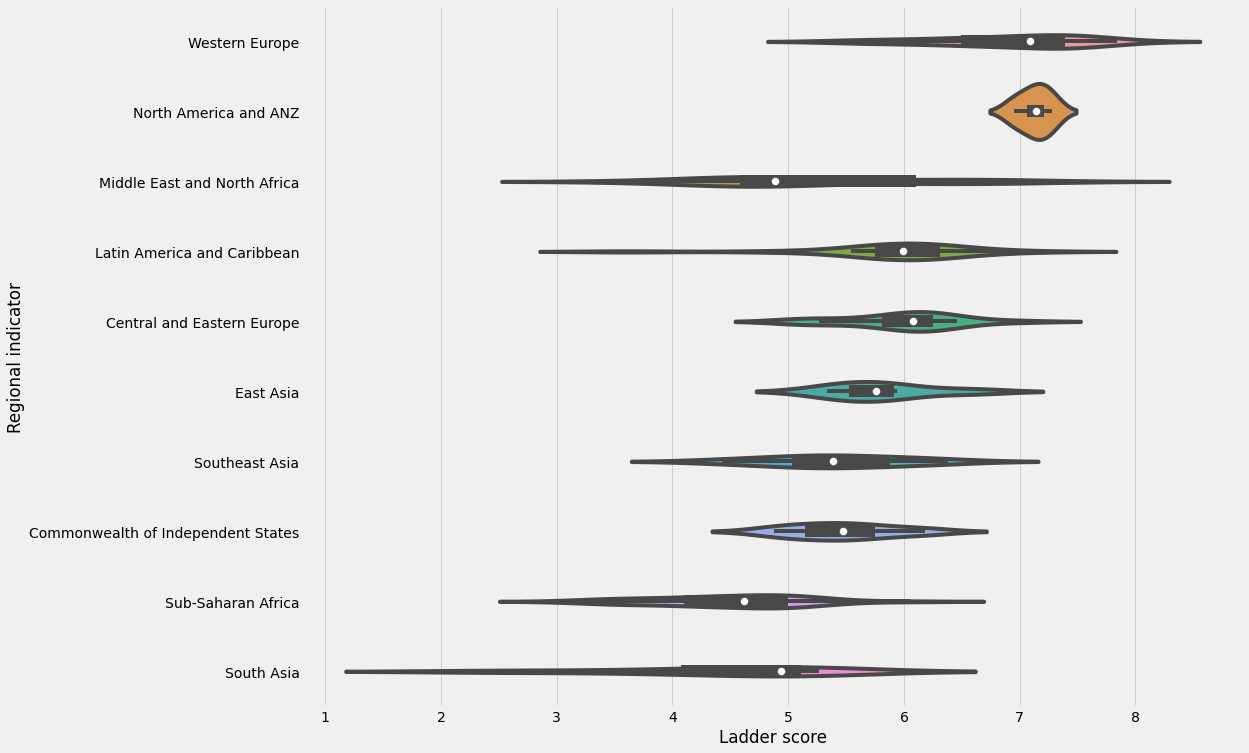

In [ ]:
plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(data2021['Ladder score'], data2021['Regional indicator'])
plt.show()

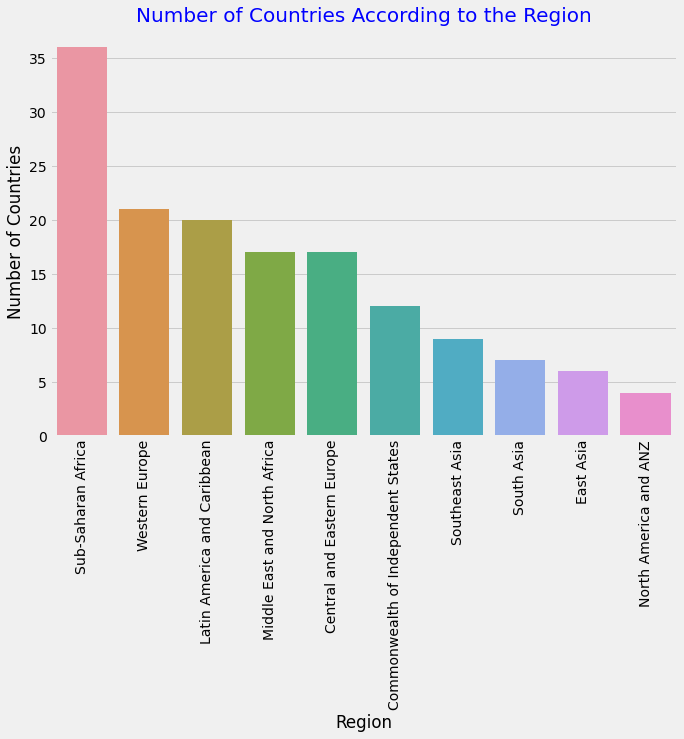

In [ ]:
dt2021 = data2021['Regional indicator'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x = dt2021.index, y = dt2021.values)
plt.xlabel('Region')
plt.xticks(rotation = 90)
plt.ylabel('Number of Countries')
plt.title('Number of Countries According to the Region', color = 'blue', fontsize = 20)
plt.show()

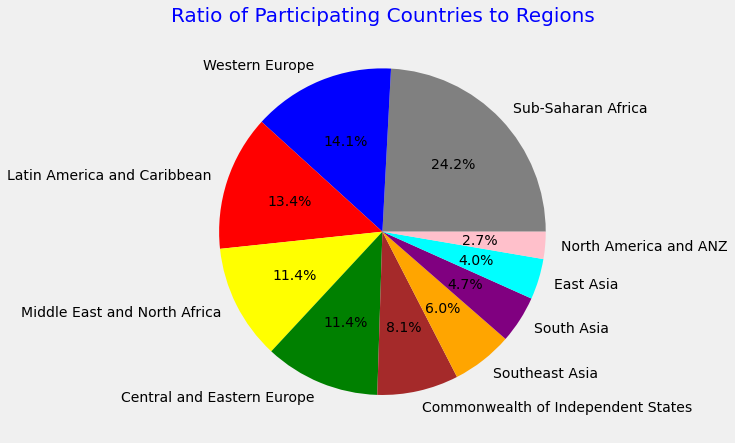

In [ ]:
labels = data2021['Regional indicator'].value_counts().index
colors = ['grey', 'blue', 'red', 'yellow', 'green', 'brown', 'orange', 'purple', 'cyan', 'pink']
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sizes = data2021['Regional indicator'].value_counts().values

plt.figure(figsize = (7,7))
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title("Ratio of Participating Countries to Regions", color = 'blue', fontsize = 20)
plt.show()

## correlation of data2021

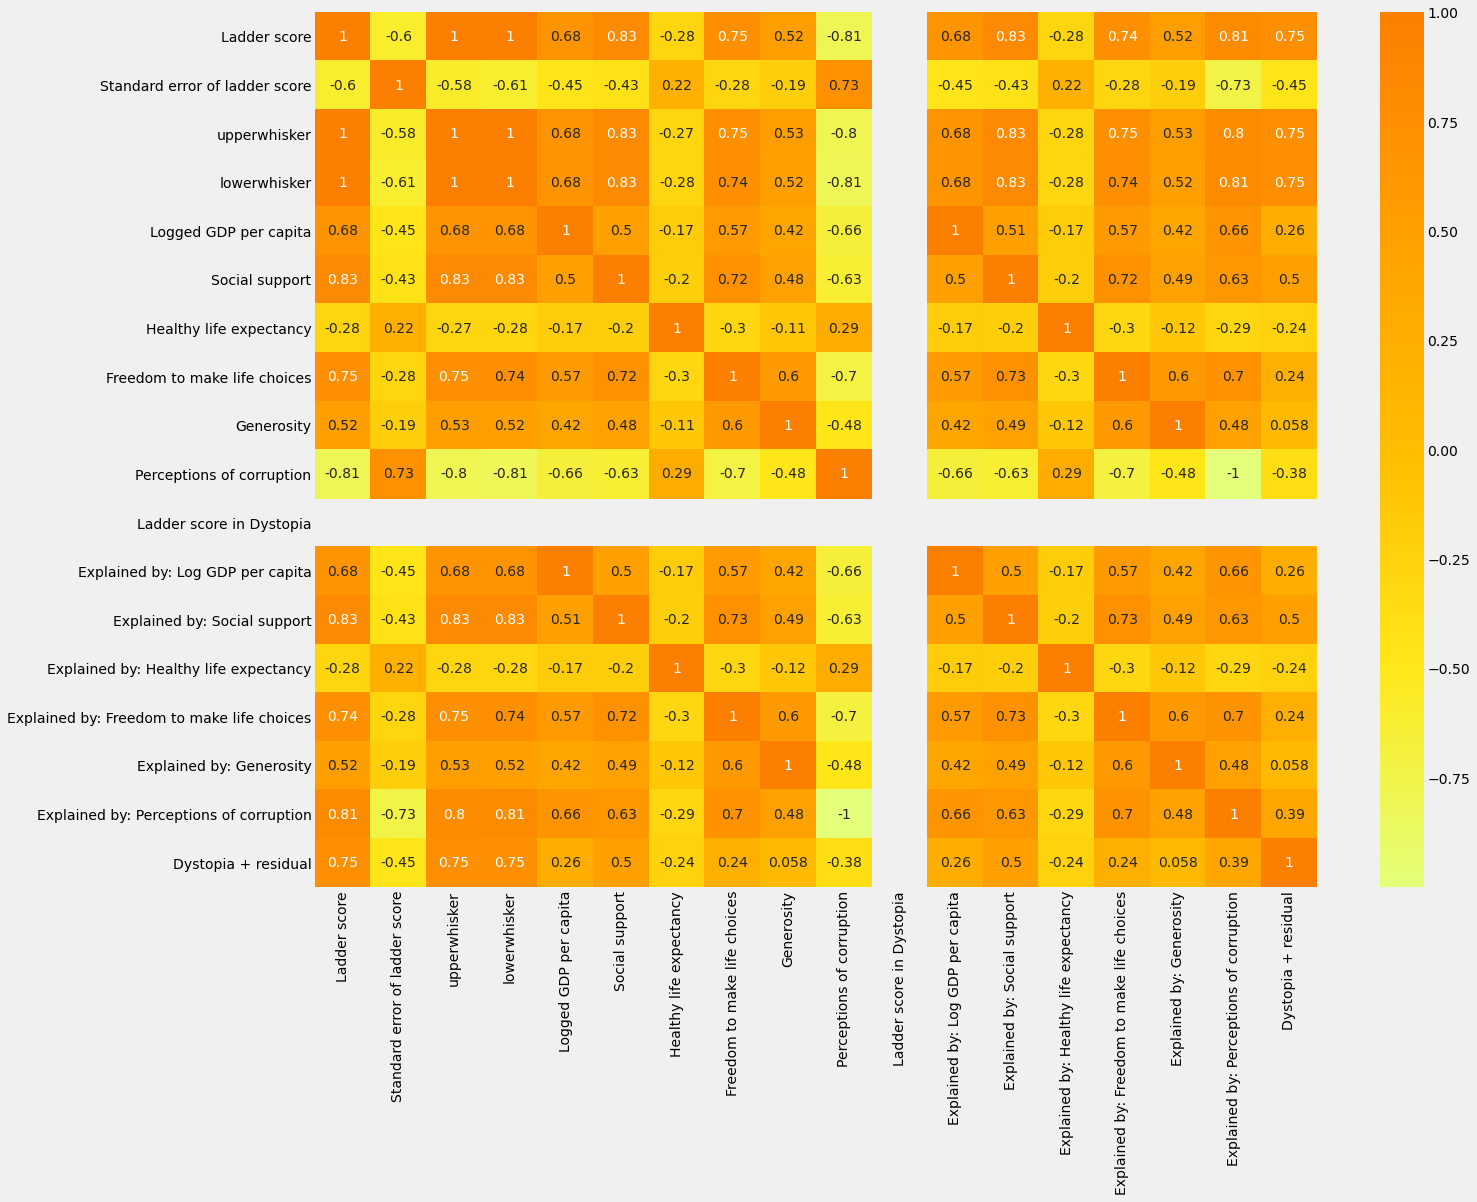

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)

d = data2021.loc[lambda data2021: data2021['Regional indicator'] == 'Western Europe']
sns.heatmap(d.corr(), cmap = 'Wistia', annot = True)

plt.show()

The Heat Map particularly for Europe has one more thing to add apart from Family Satisfaction, Freedom, Economy, Generosity, It is also highly correlated with Trust in Government.

The European Region is the Happiest Region so far.

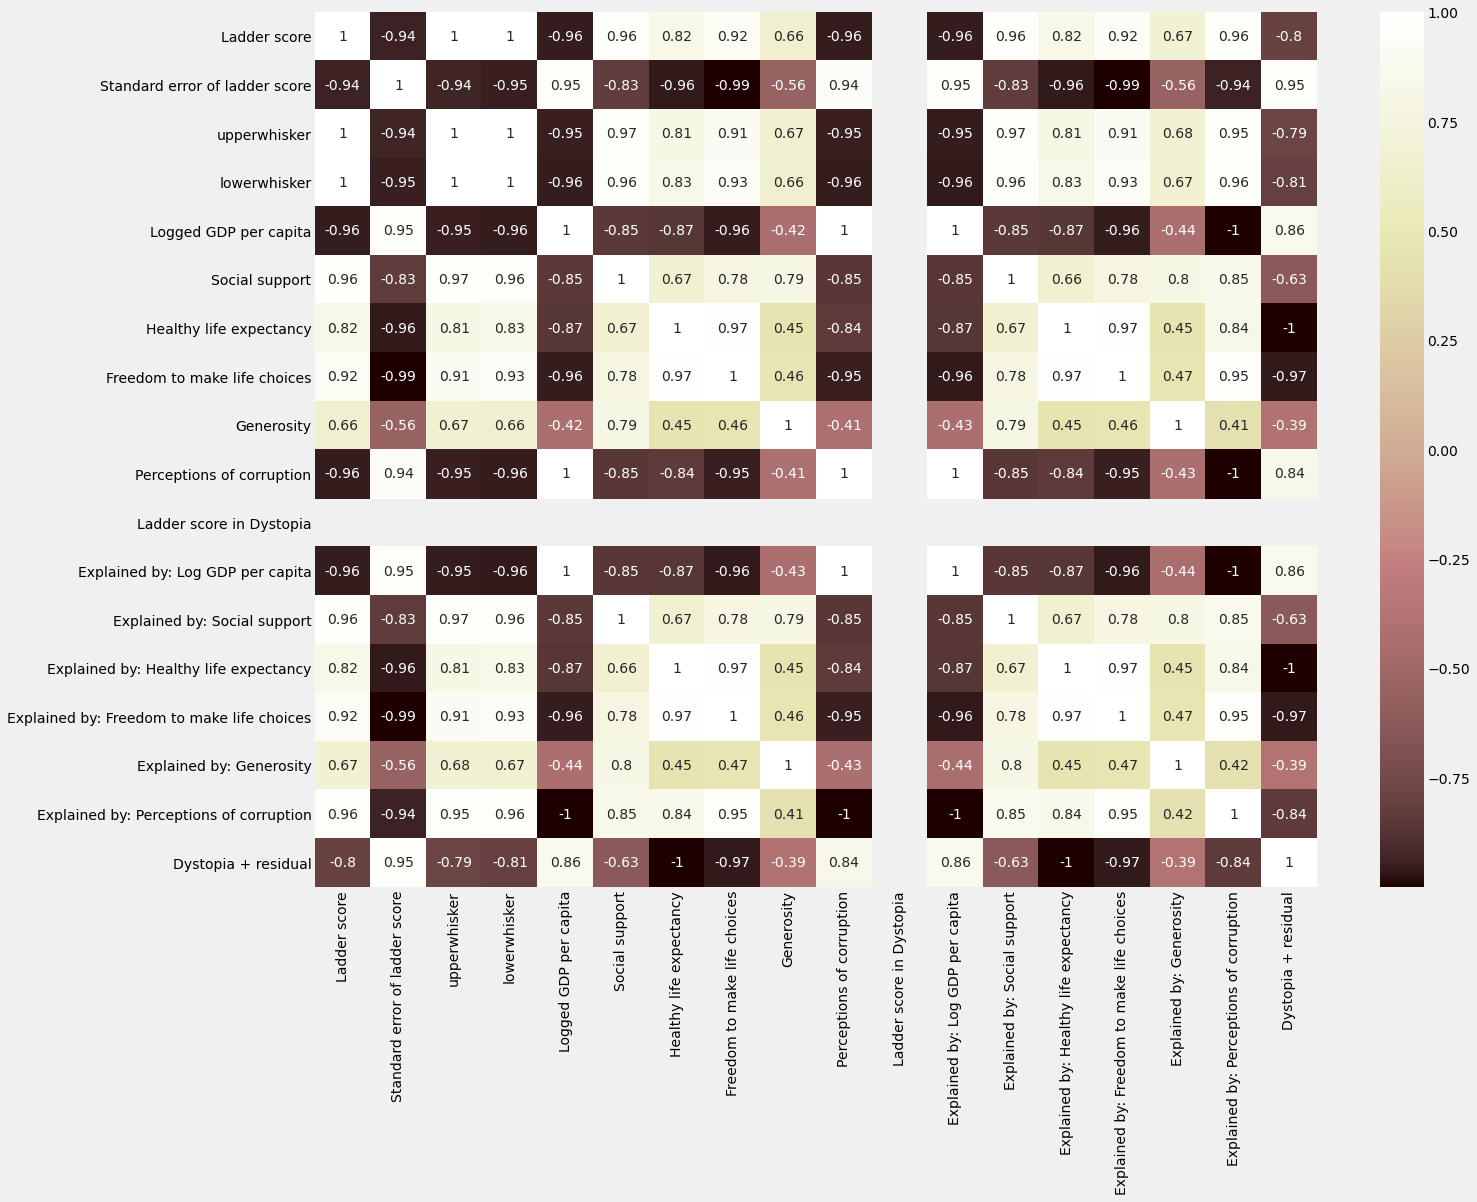

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)

d = data2021.loc[lambda data2021: data2021['Regional indicator'] == 'North America and ANZ']
sns.heatmap(d.corr(), cmap = 'pink', annot = True)

plt.show()

Everything is highly correlated to the Happiness in America. Amongst so many countries of the world. Being a very large country also America is still able to keep their people happy. America stands at position number 10 amongst the Happiness Rankings for the World.

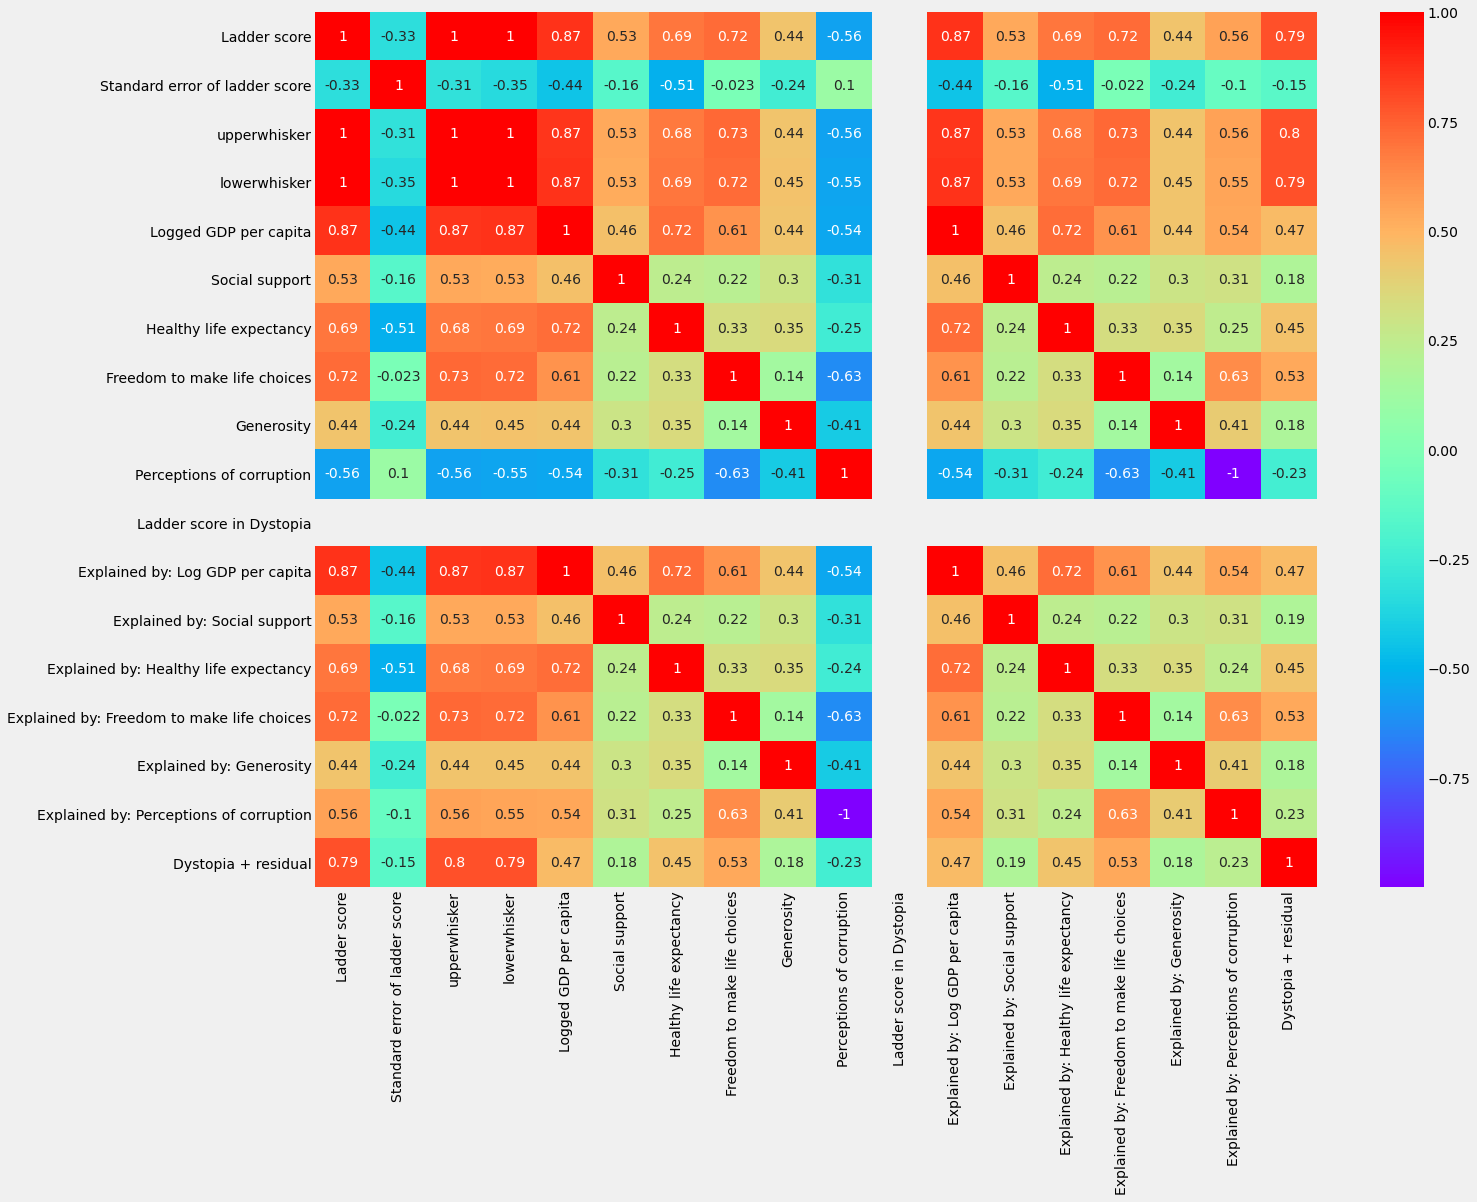

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)

d = data2021.loc[lambda data2021: data2021['Regional indicator'] == 'Middle East and North Africa']
sns.heatmap(d.corr(), cmap = 'rainbow', annot = True)

plt.show()

The correlations are quite goood with almost all the important factors being highly correlated with Happiness. Family Satisfaction is the most important factor as it is the most important factor for happiness n this region.

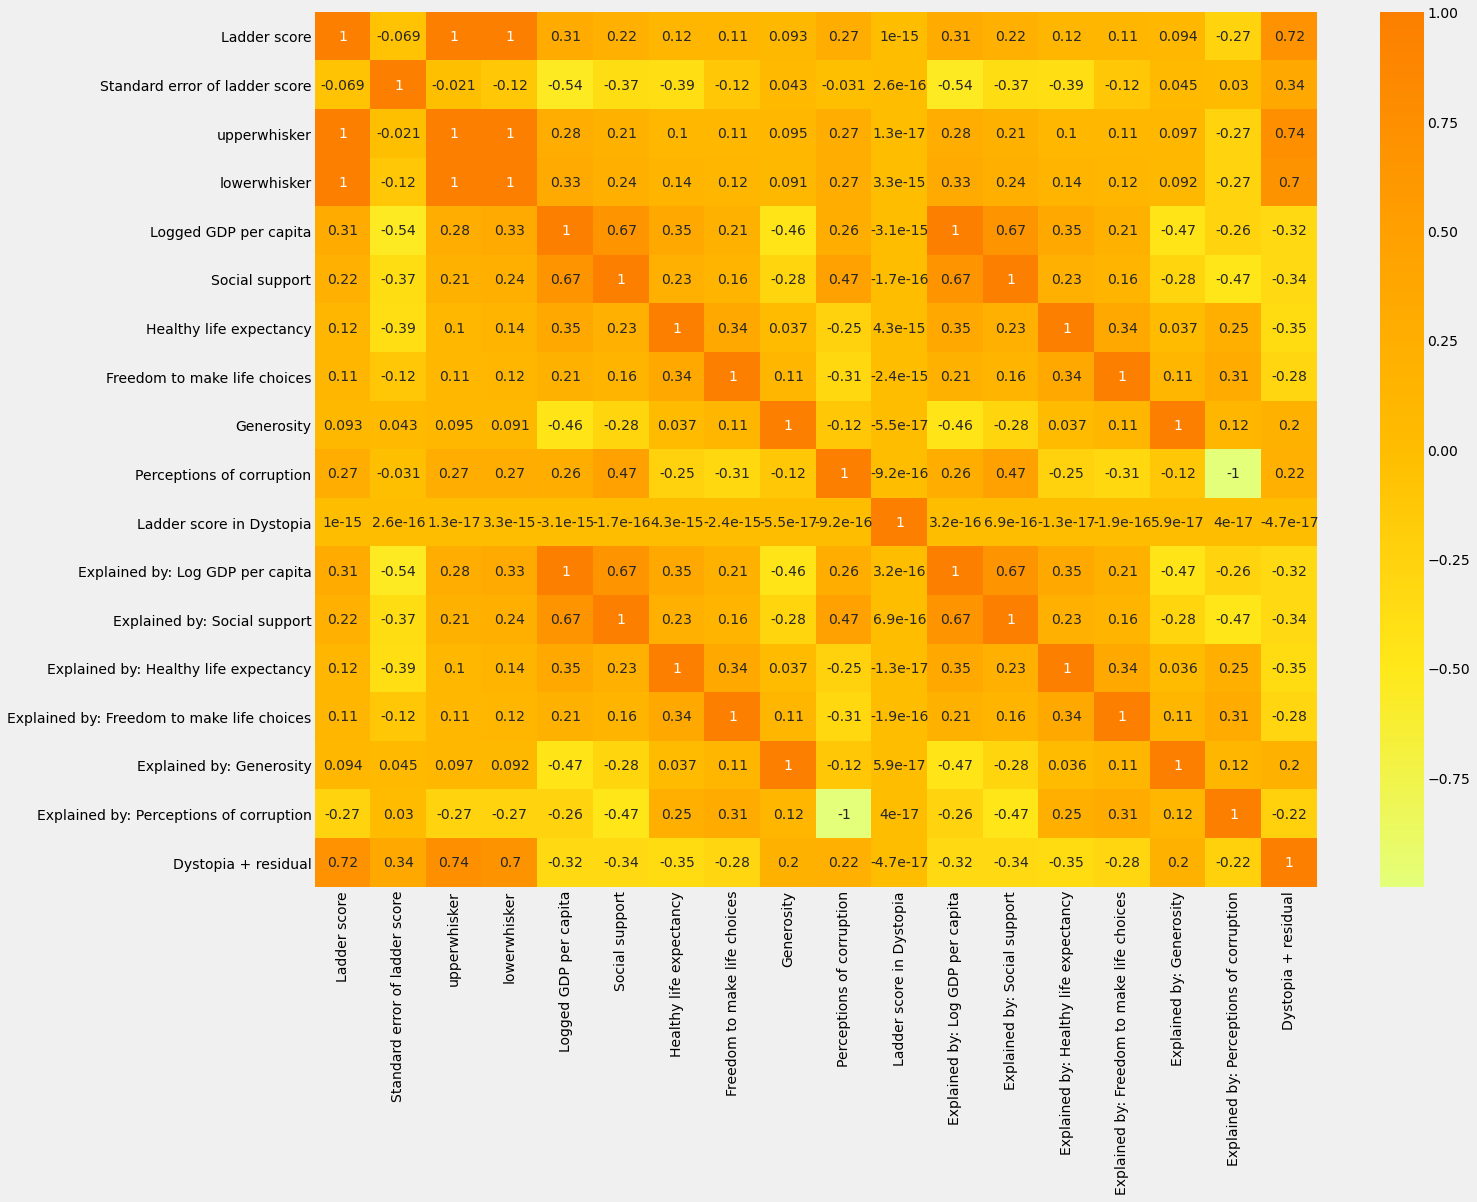

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)

d = data2021.loc[lambda data2021: data2021['Regional indicator'] == 'Sub-Saharan Africa']
sns.heatmap(d.corr(), cmap = 'Wistia', annot = True)

plt.show()

The Situations are very bad for Sub-Saharan Region as it is the unhappiest region in the world. The correlations with Happiness Score are very low for features such as Generosity, Family Satisfaction, Freedom etc. Almost all of the features are having less than 0.5 correlation which is very bad.

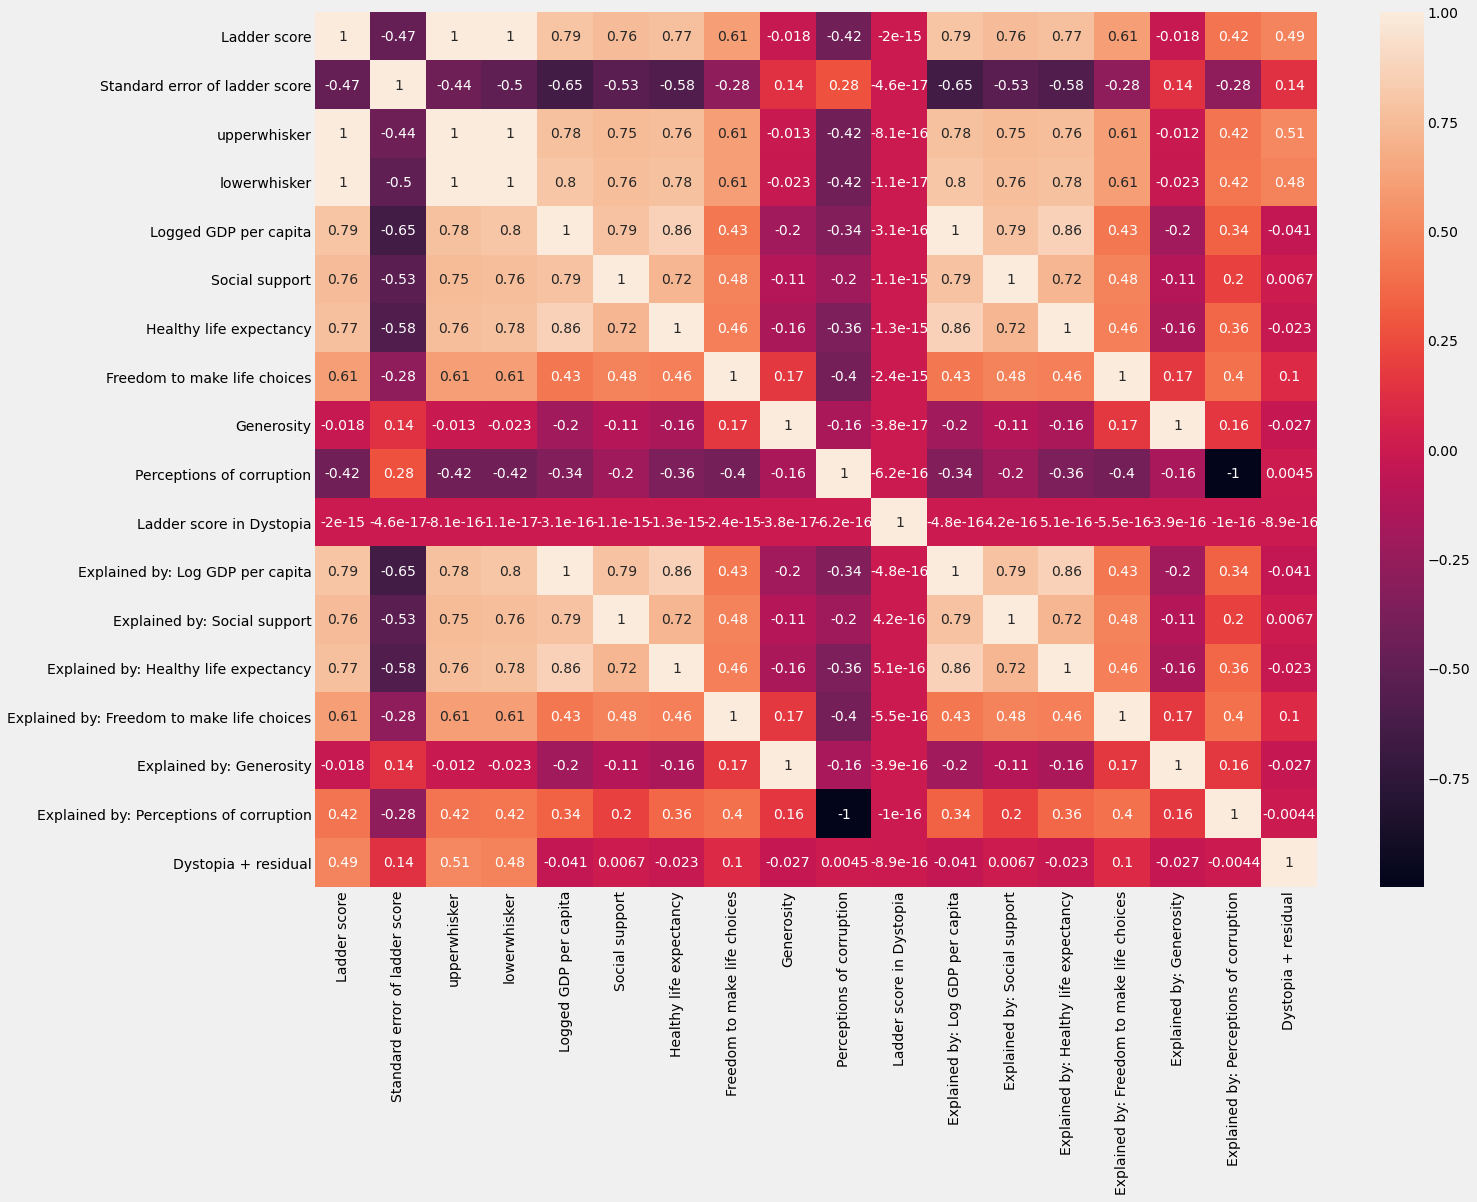

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(data2021.corr(), annot = True)

plt.show()

## Plotting pairwise relationships in the data set



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



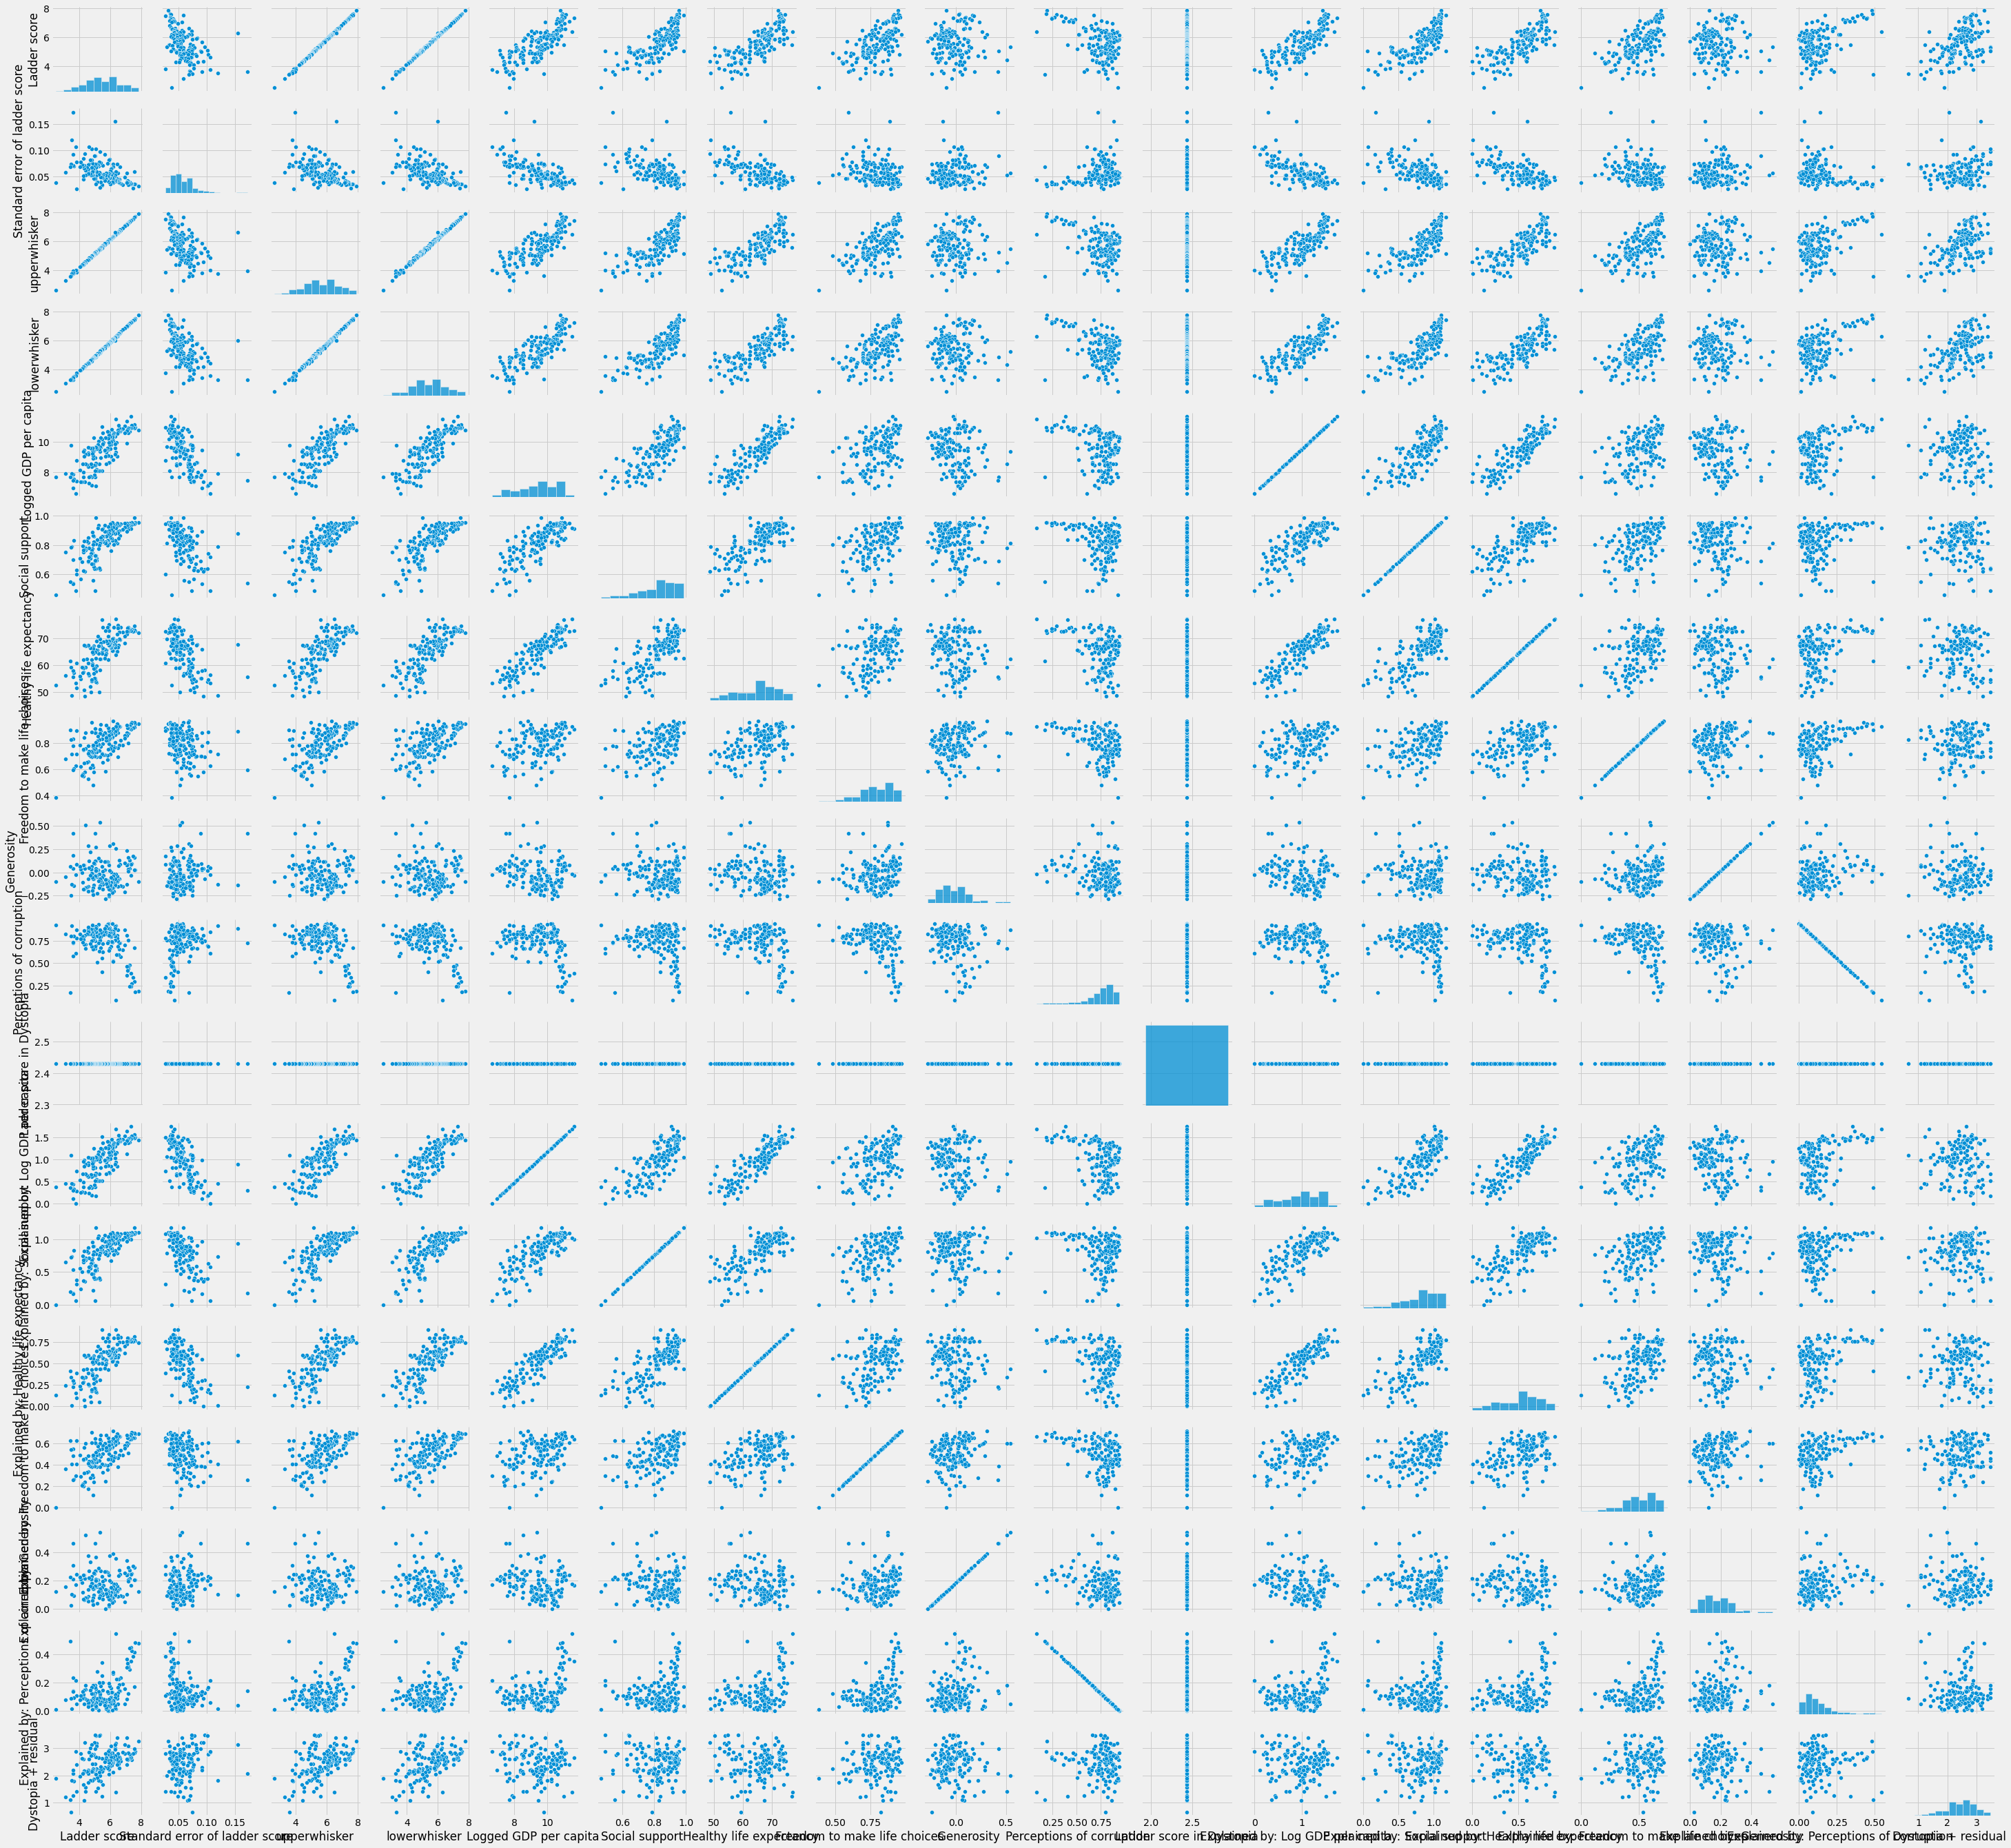

In [ ]:
sns.pairplot(data2021)

## Let's compare variables

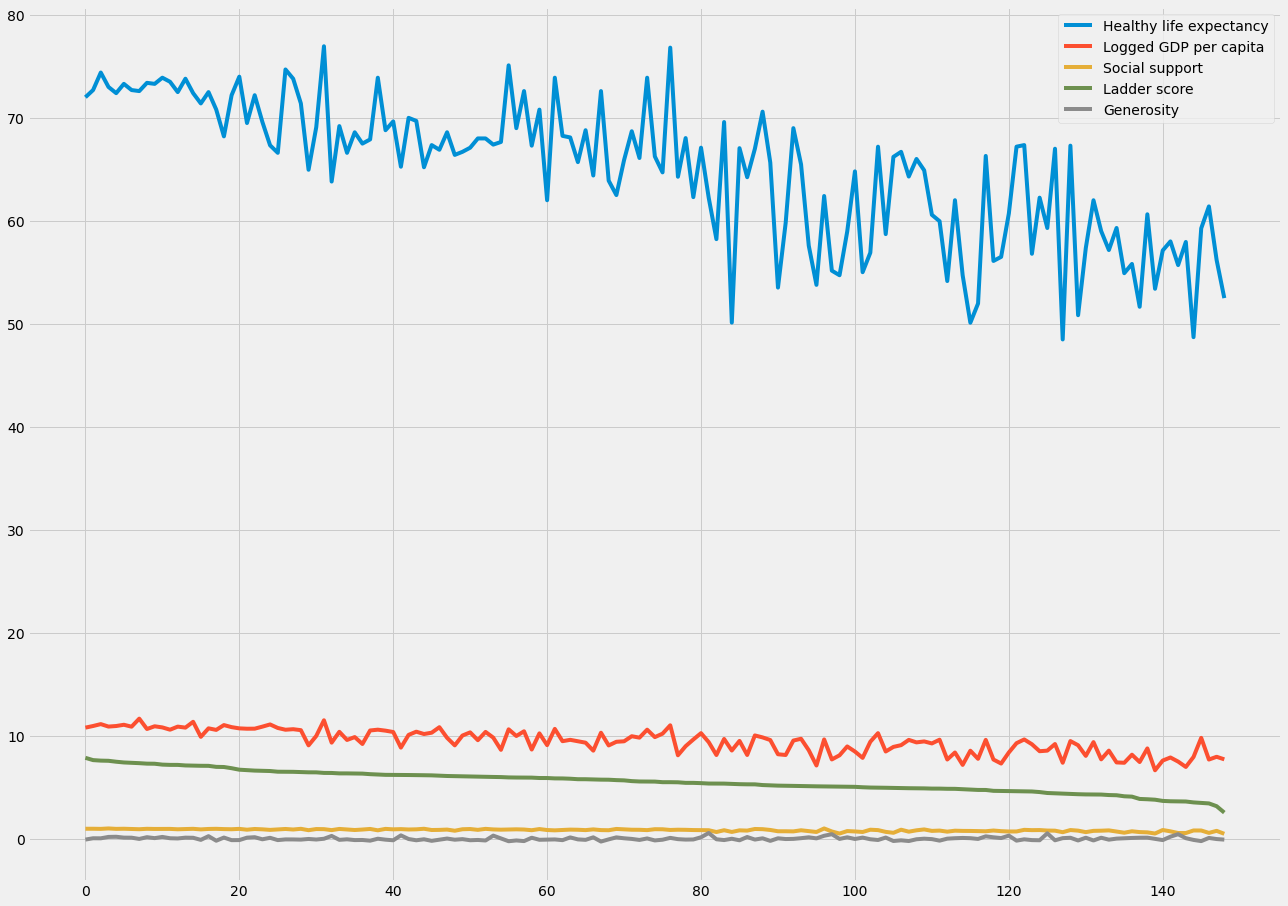

In [ ]:
data_plot = data2021.loc[:,["Healthy life expectancy",'Logged GDP per capita', 'Social support','Ladder score','Generosity' ]]
data_plot.plot()

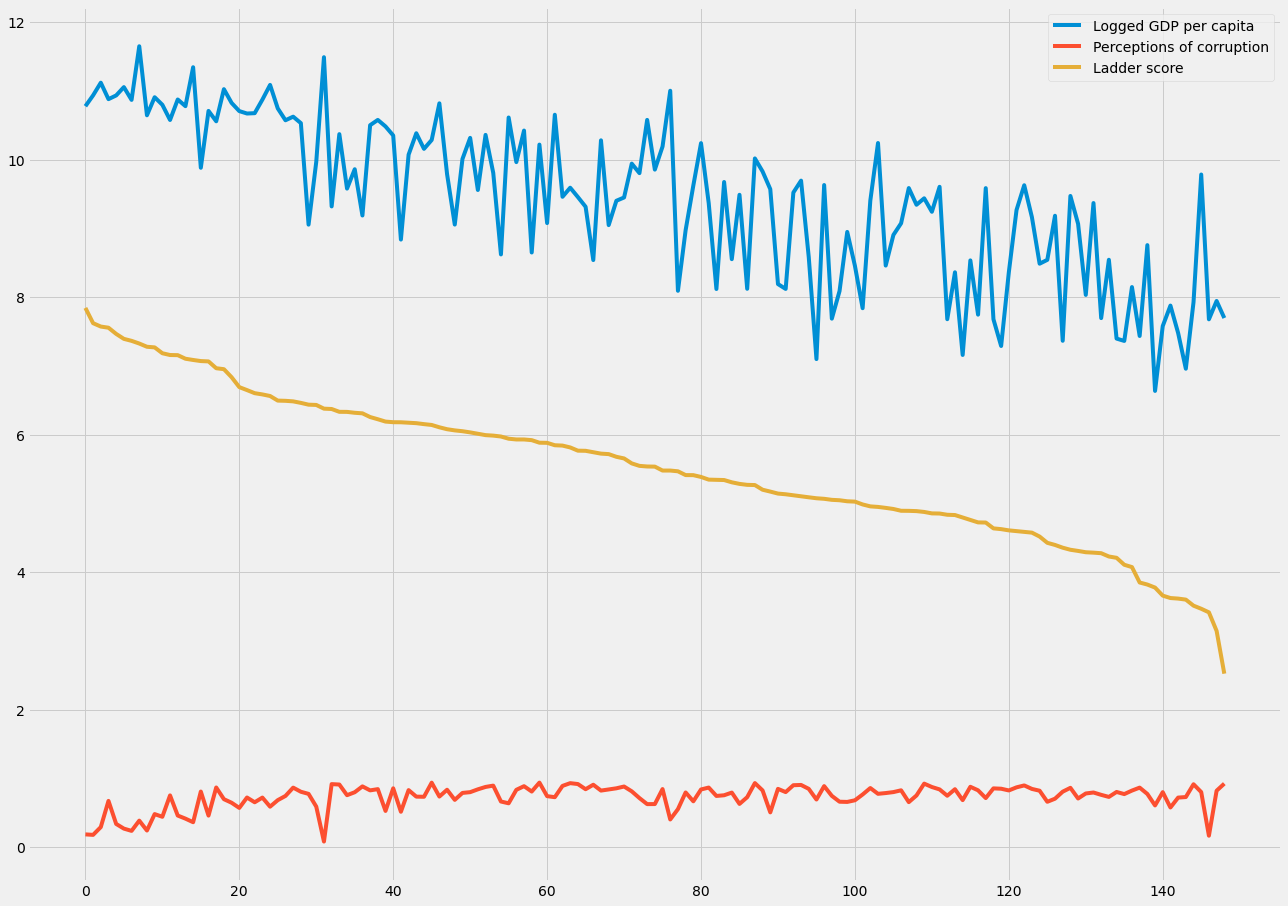

In [ ]:
data_plot = data2021.loc[:,['Logged GDP per capita','Perceptions of corruption','Ladder score' ]]
data_plot.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3665dcd6d0>,
      dtype=object)

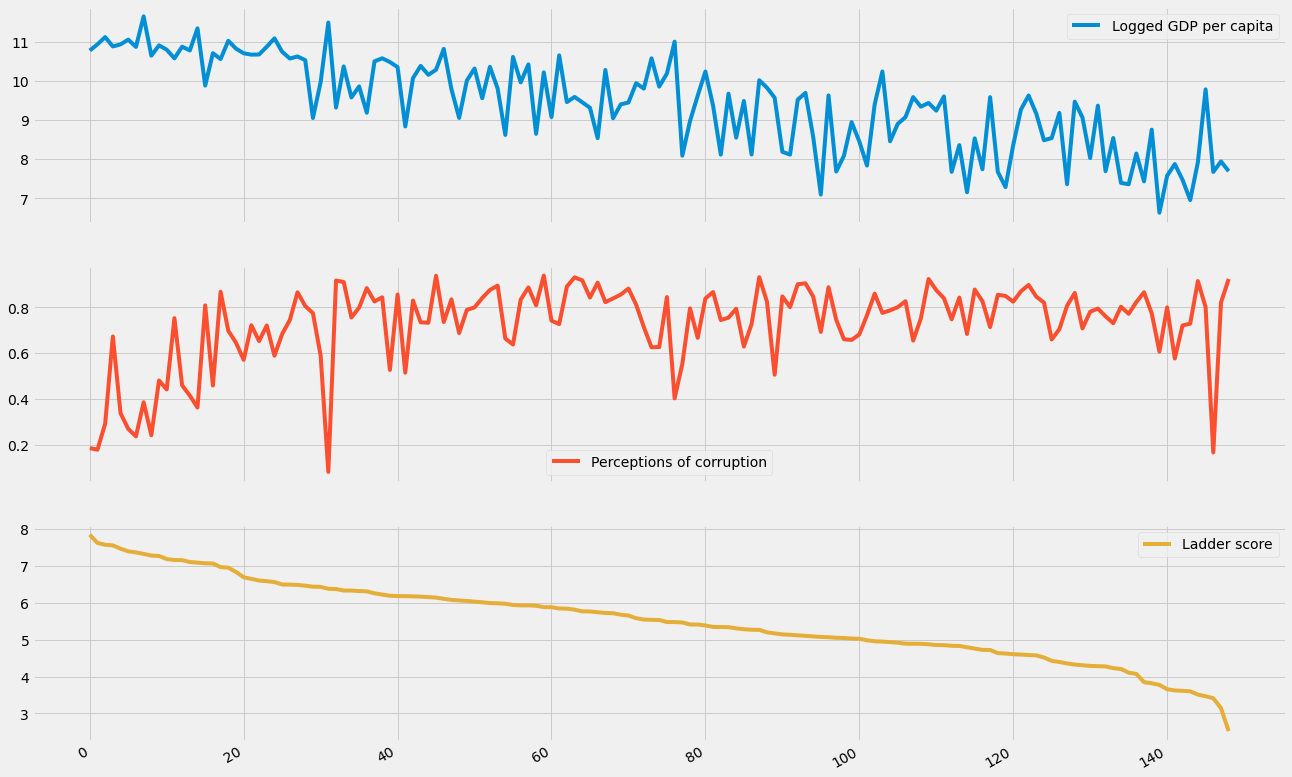

In [ ]:
data_plot.plot(subplots = True)

<img src = "https://i2.wp.com/1.bp.blogspot.com/-stUzZWAujNo/XdMQRgvYdlI/AAAAAAAABWg/BVB0iYLSBzQKl8tJMtu9LFFDKkQ22qg7gCLcBGAsYHQ/s640/scatter%2Bserpilme.png?w=620&ssl=1" width=500 />

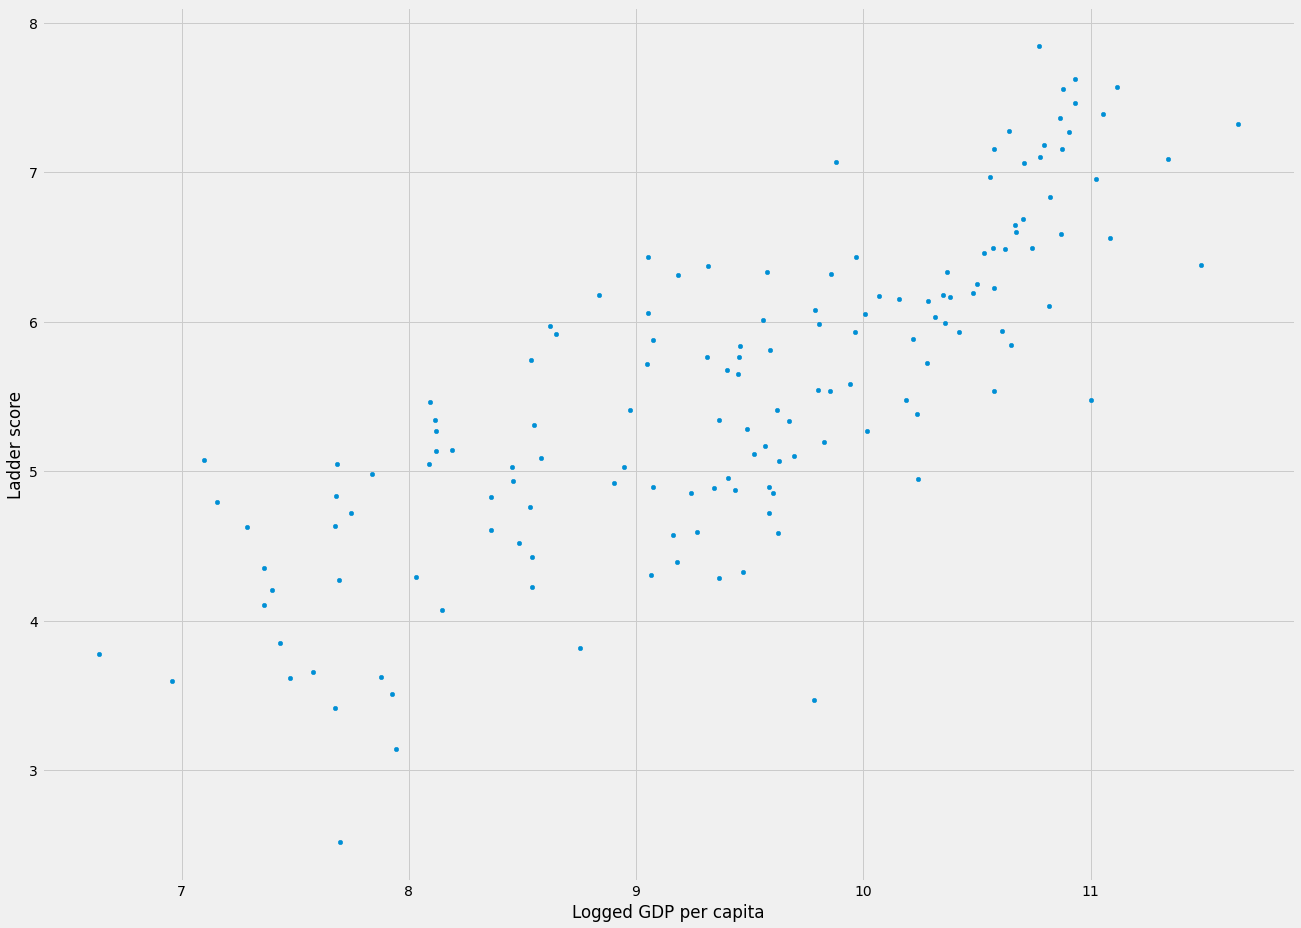

In [ ]:
data_plot.plot(kind = "scatter", x = 'Logged GDP per capita', y = 'Ladder score')

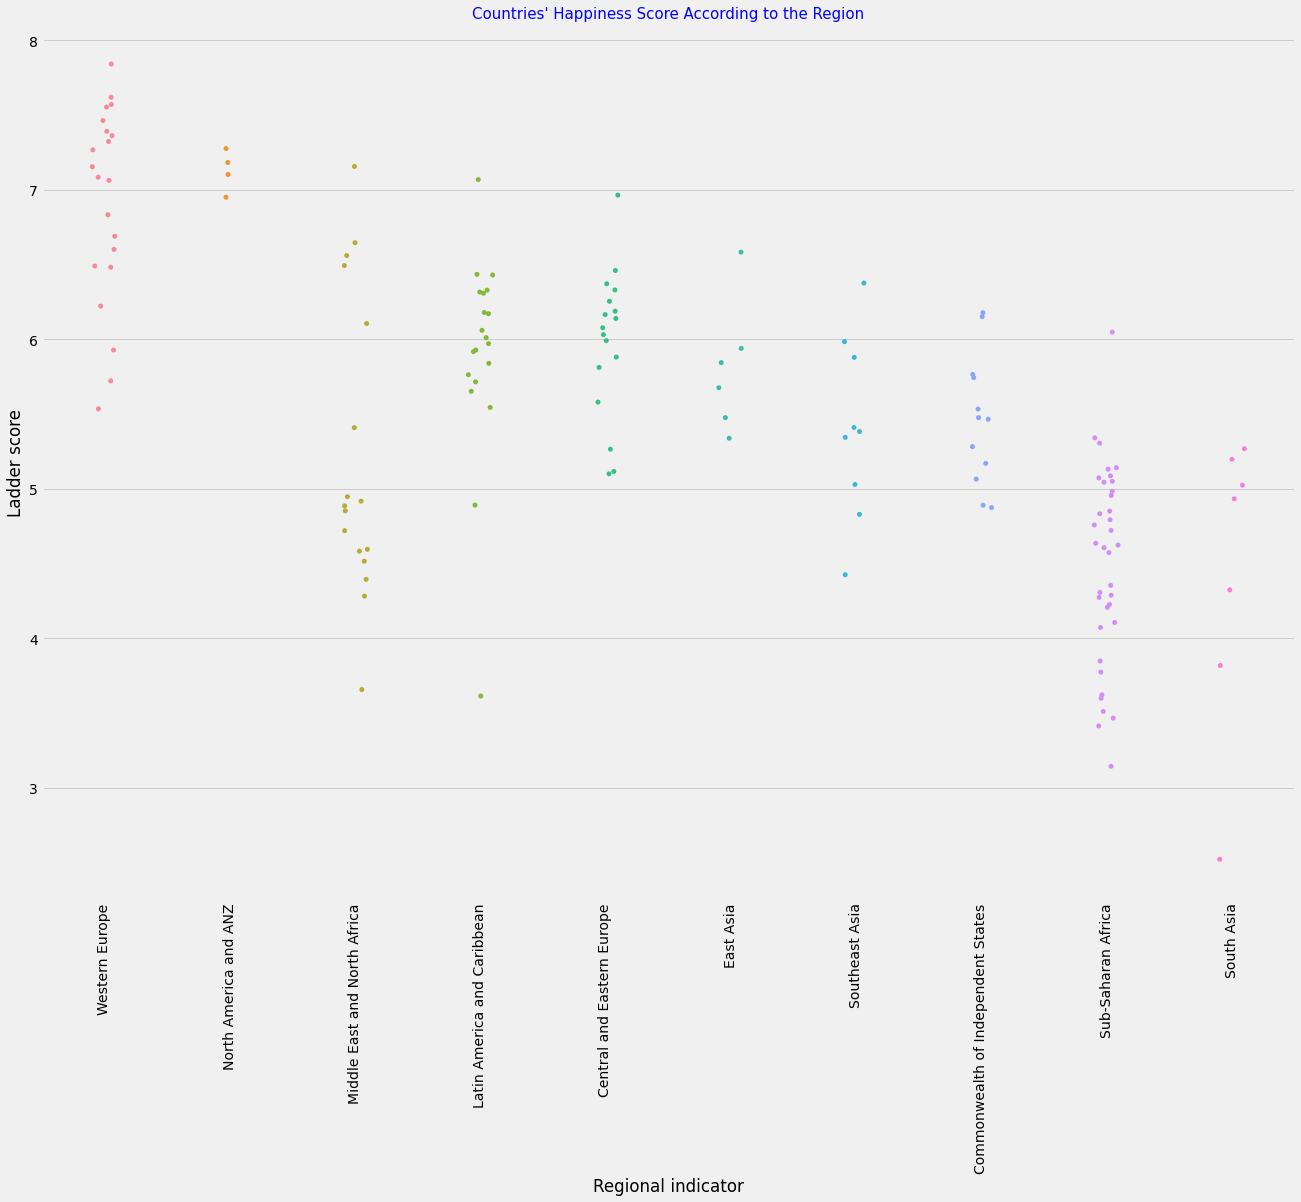

In [ ]:
x = sns.stripplot(x = "Regional indicator", y = "Ladder score", data = data2021, jitter = True)
plt.xticks(rotation = 90)
plt.title("Countries' Happiness Score According to the Region", color = 'blue', fontsize = 15)
plt.show()

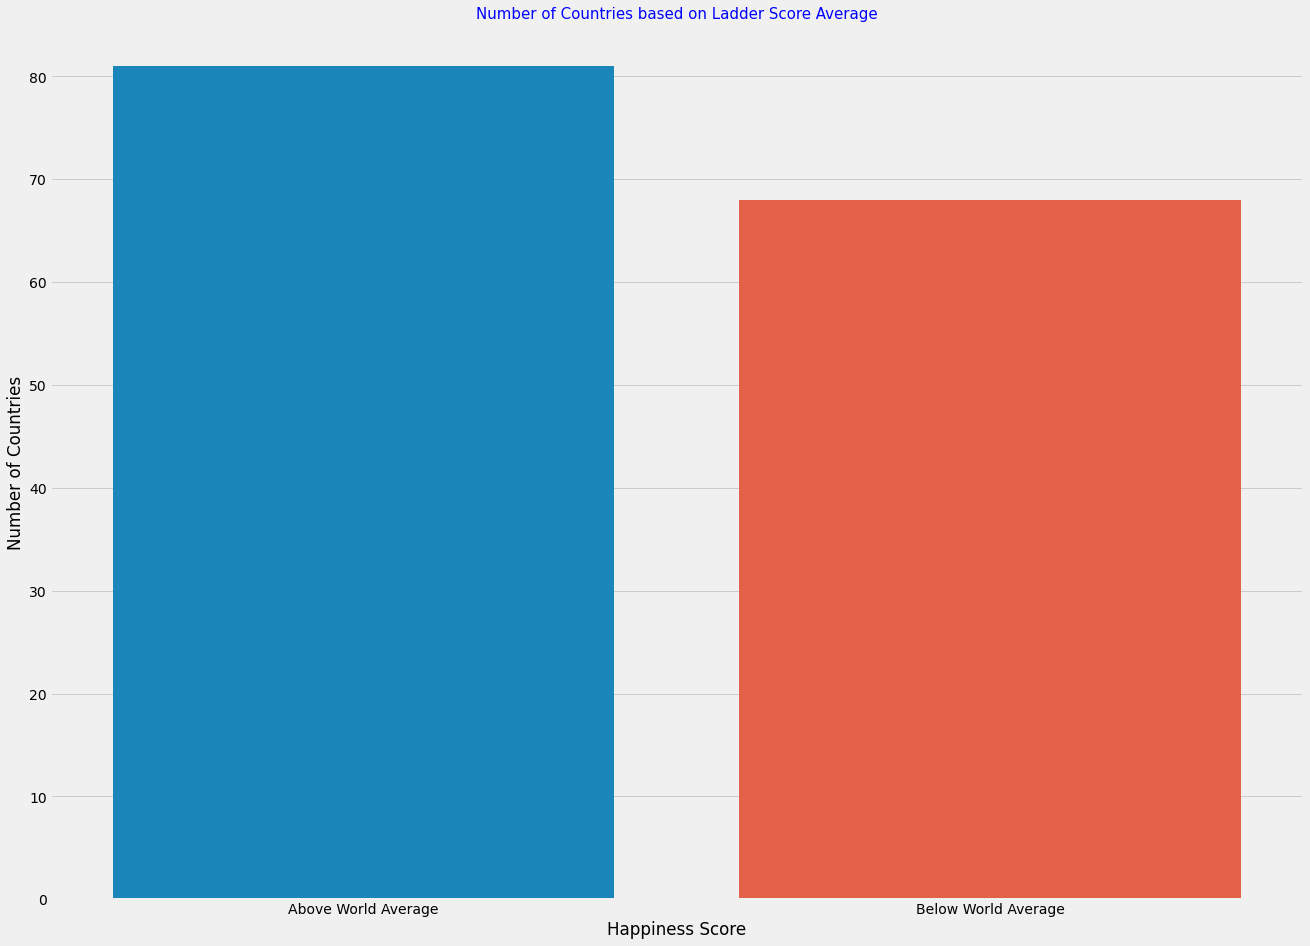

In [ ]:
above_mean_HS =['Above World Average' if i >= 5.35 else 'Below World Average' for i in data2021['Ladder score']]
df = pd.DataFrame({'Ladder score' : above_mean_HS})
sns.countplot(x = df['Ladder score'])
plt.xlabel('Happiness Score')
plt.ylabel('Number of Countries')
plt.title('Number of Countries based on Ladder Score Average', color = 'blue', fontsize = 15)
plt.show()

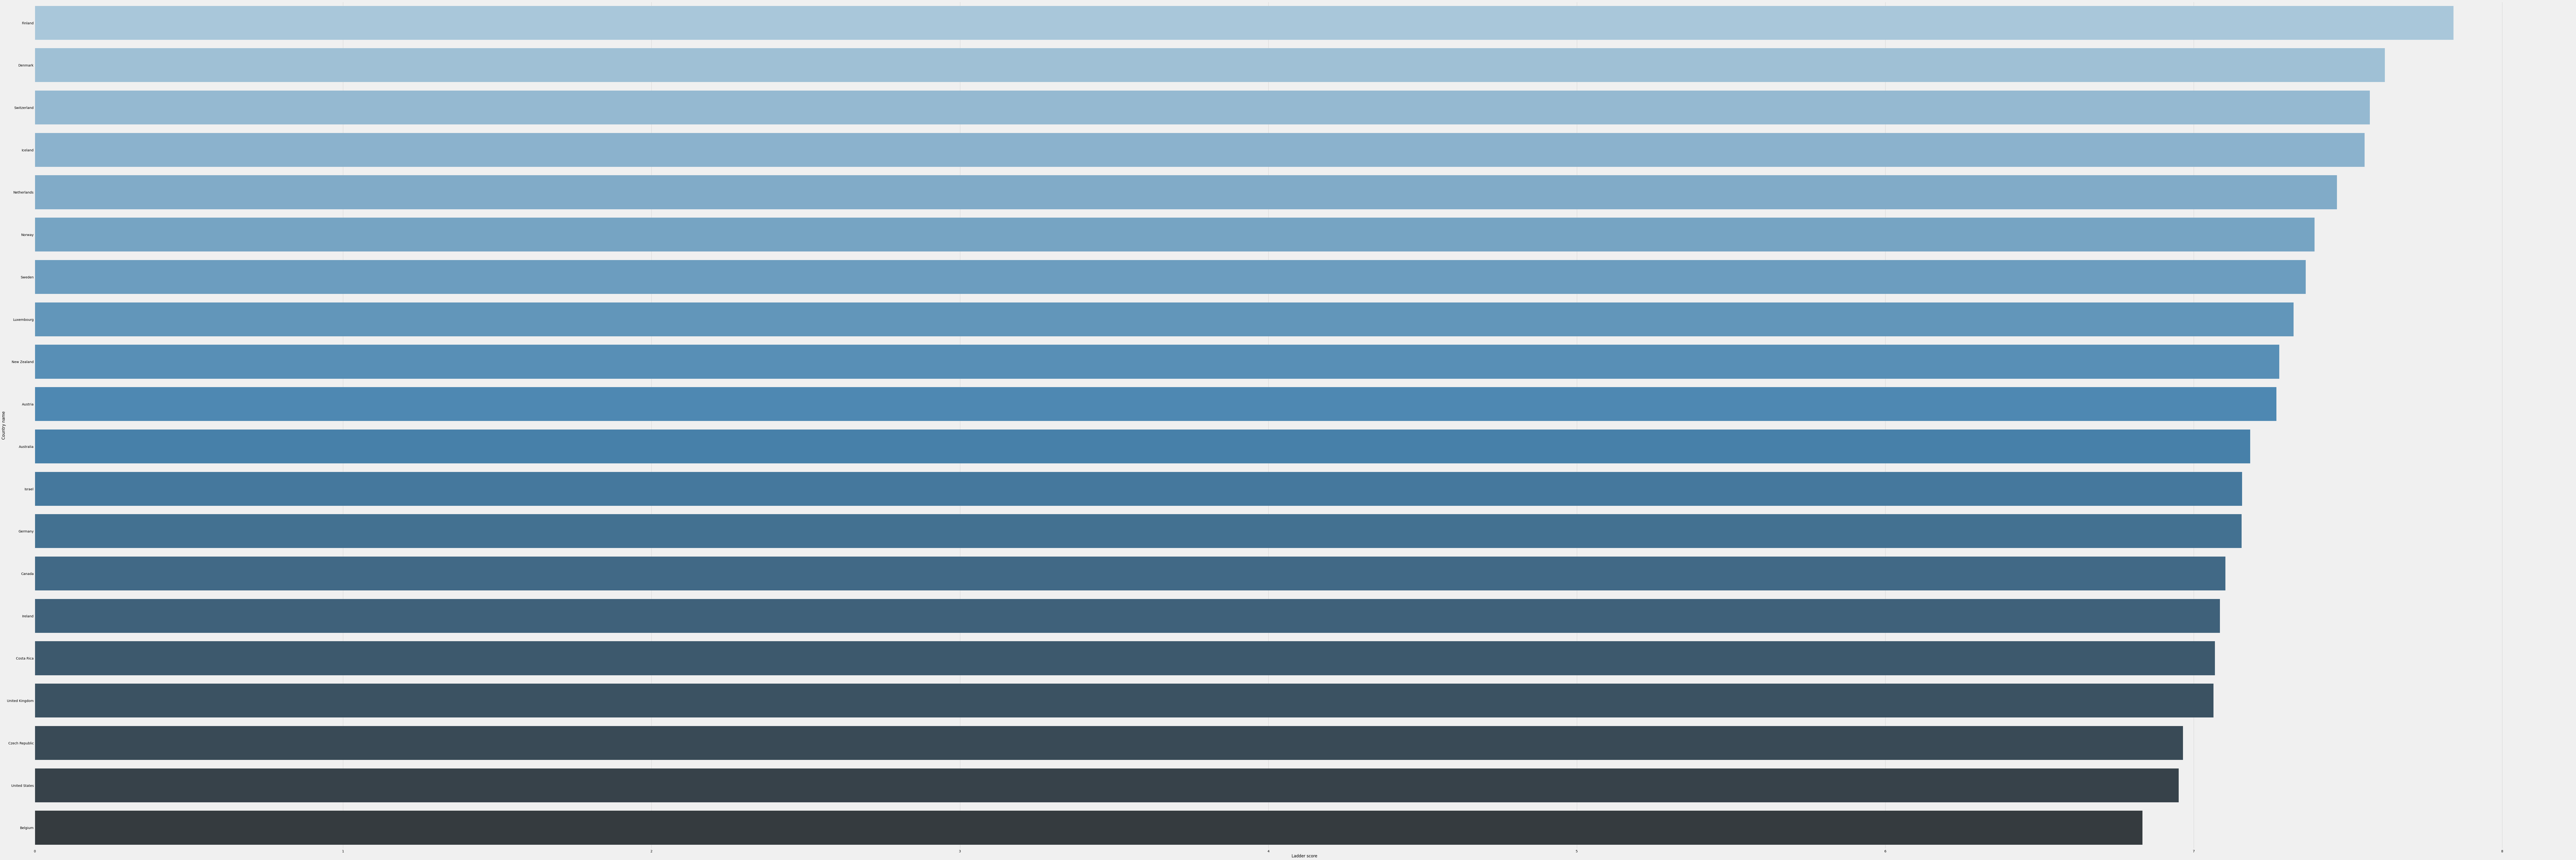

In [ ]:
fig, axes = plt.subplots(constrained_layout=True,figsize=(150,50))

sns.barplot(x='Ladder score',y='Country name',data=data2021.nlargest(20,'Ladder score'),palette="Blues_d")

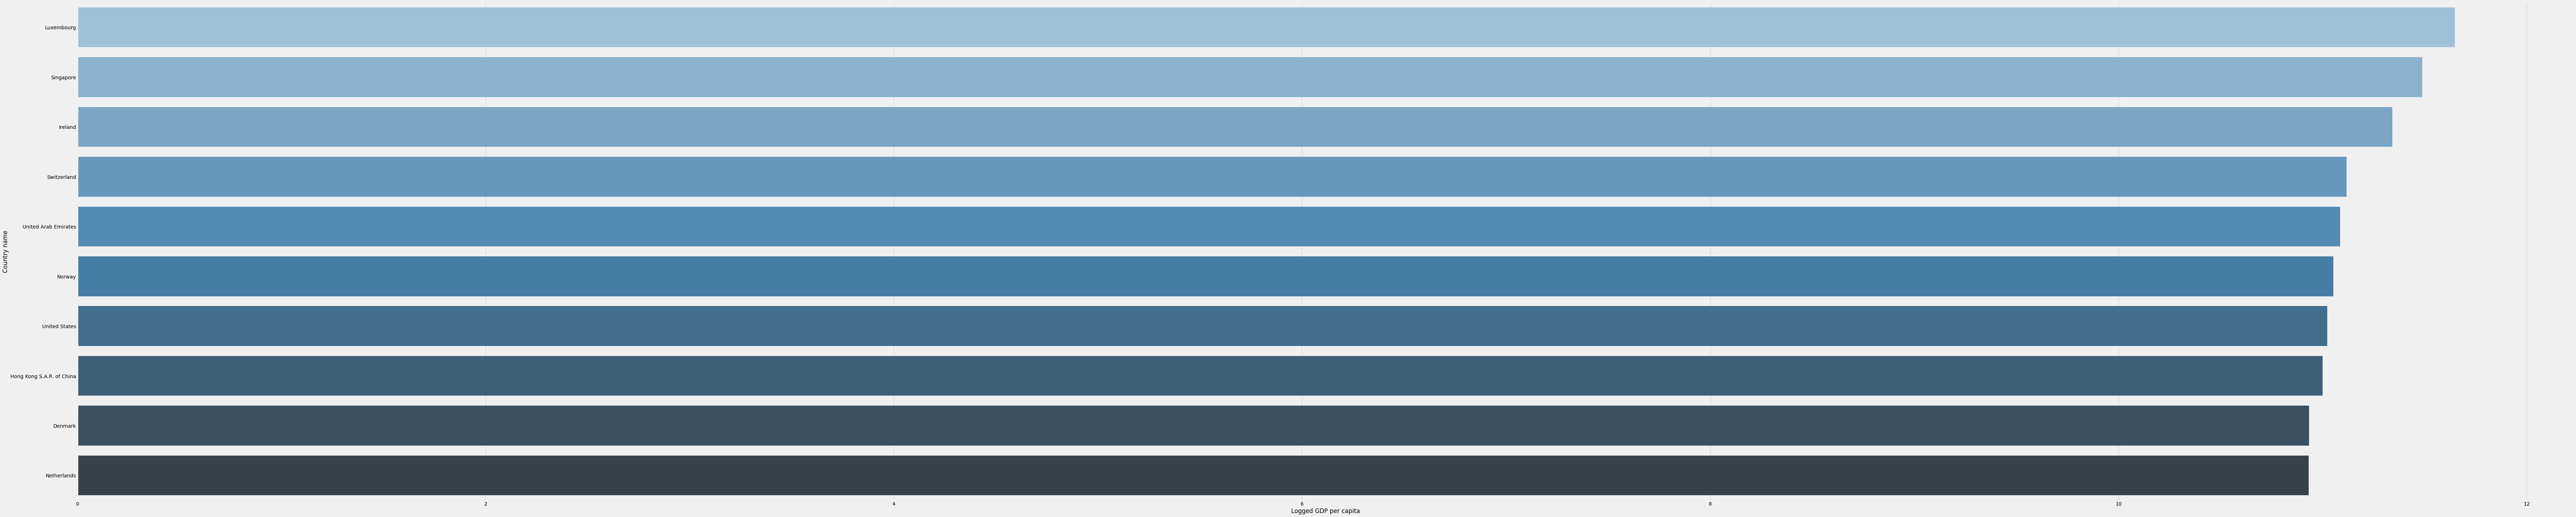

In [ ]:
fig, axes = plt.subplots(constrained_layout=True,figsize=(100,20))

sns.barplot(x='Logged GDP per capita',y='Country name',data=data2021.nlargest(10,'Logged GDP per capita'),palette="Blues_d")

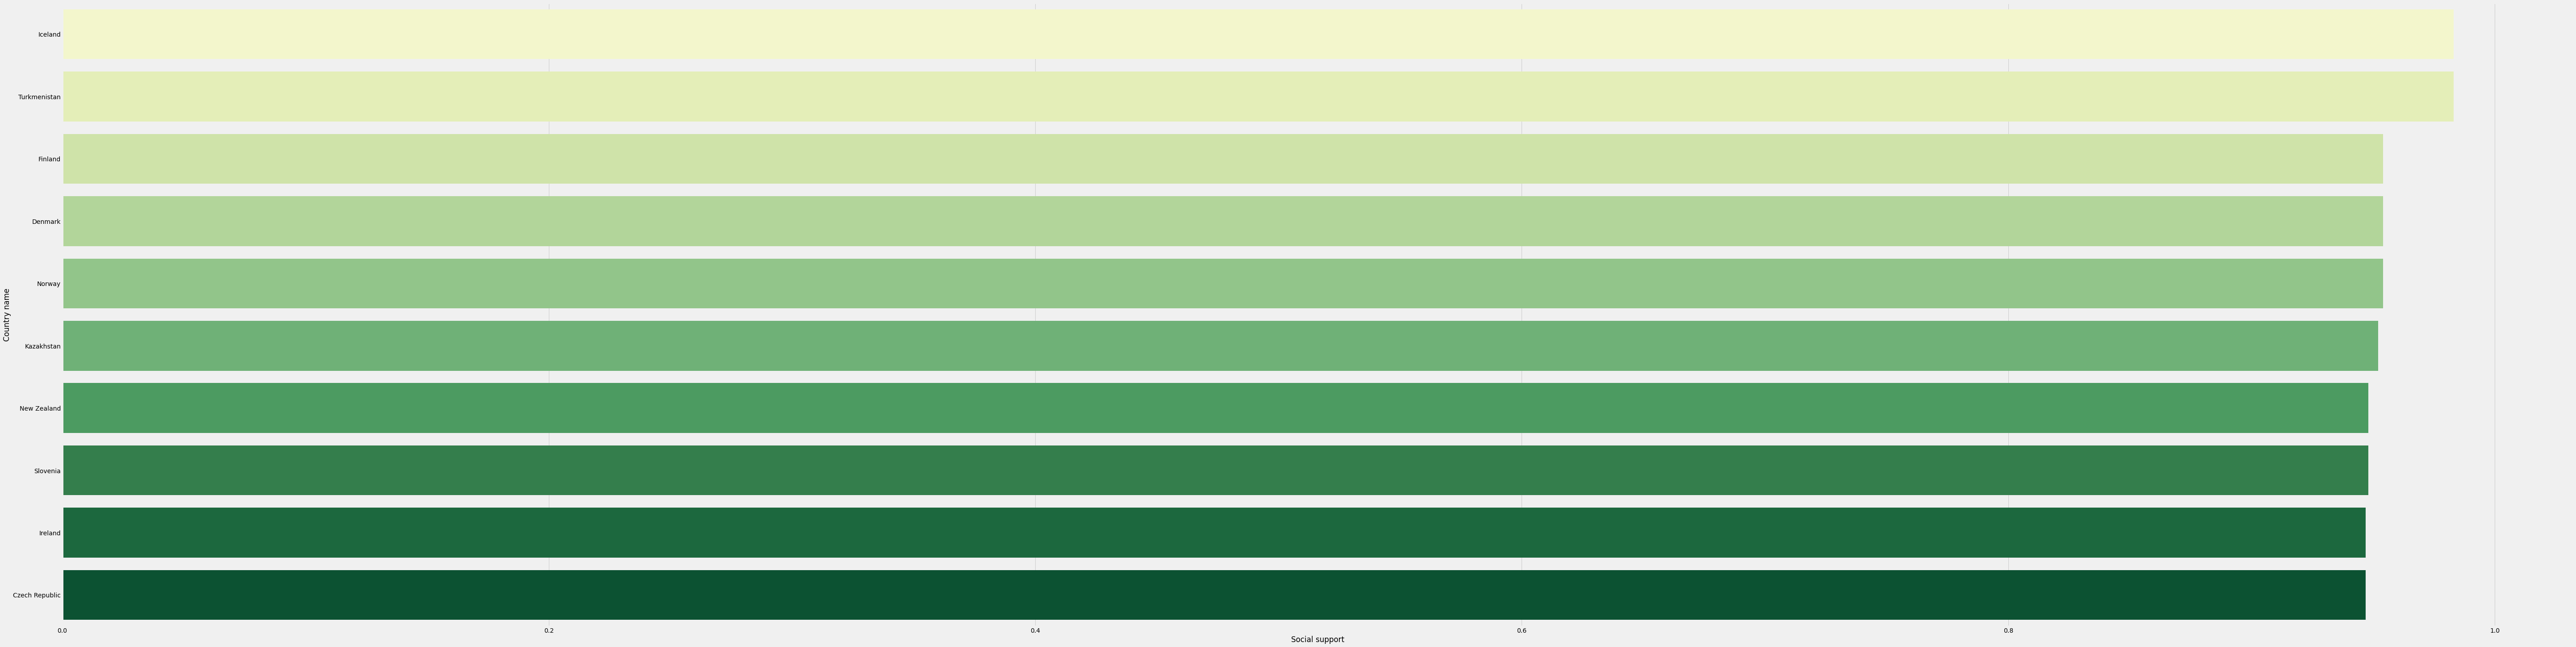

In [ ]:
fig, axes = plt.subplots(constrained_layout=True,figsize=(80,20))
sns.barplot(x='Social support' ,y='Country name',data=data2021.nlargest(10,'Social support'),palette="YlGn")

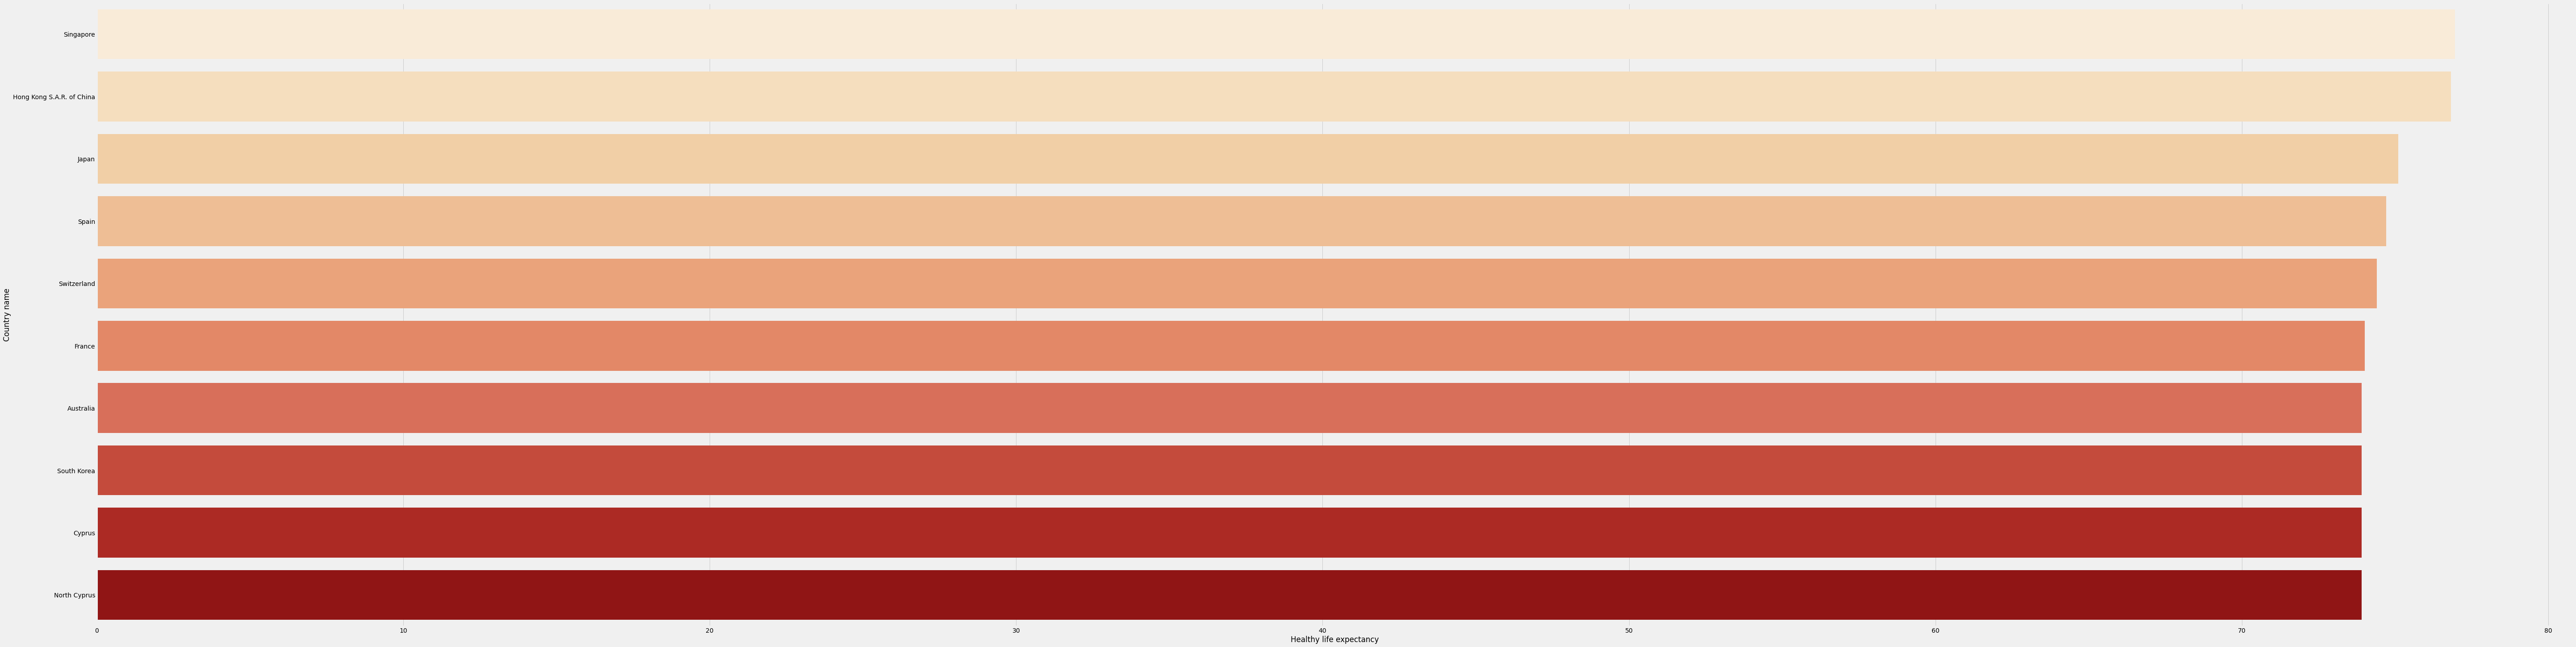

In [ ]:
fig, axes = plt.subplots(constrained_layout=True,figsize=(80,20))
sns.barplot(x='Healthy life expectancy' ,y='Country name',data=data2021.nlargest(10,'Healthy life expectancy'),palette='OrRd')

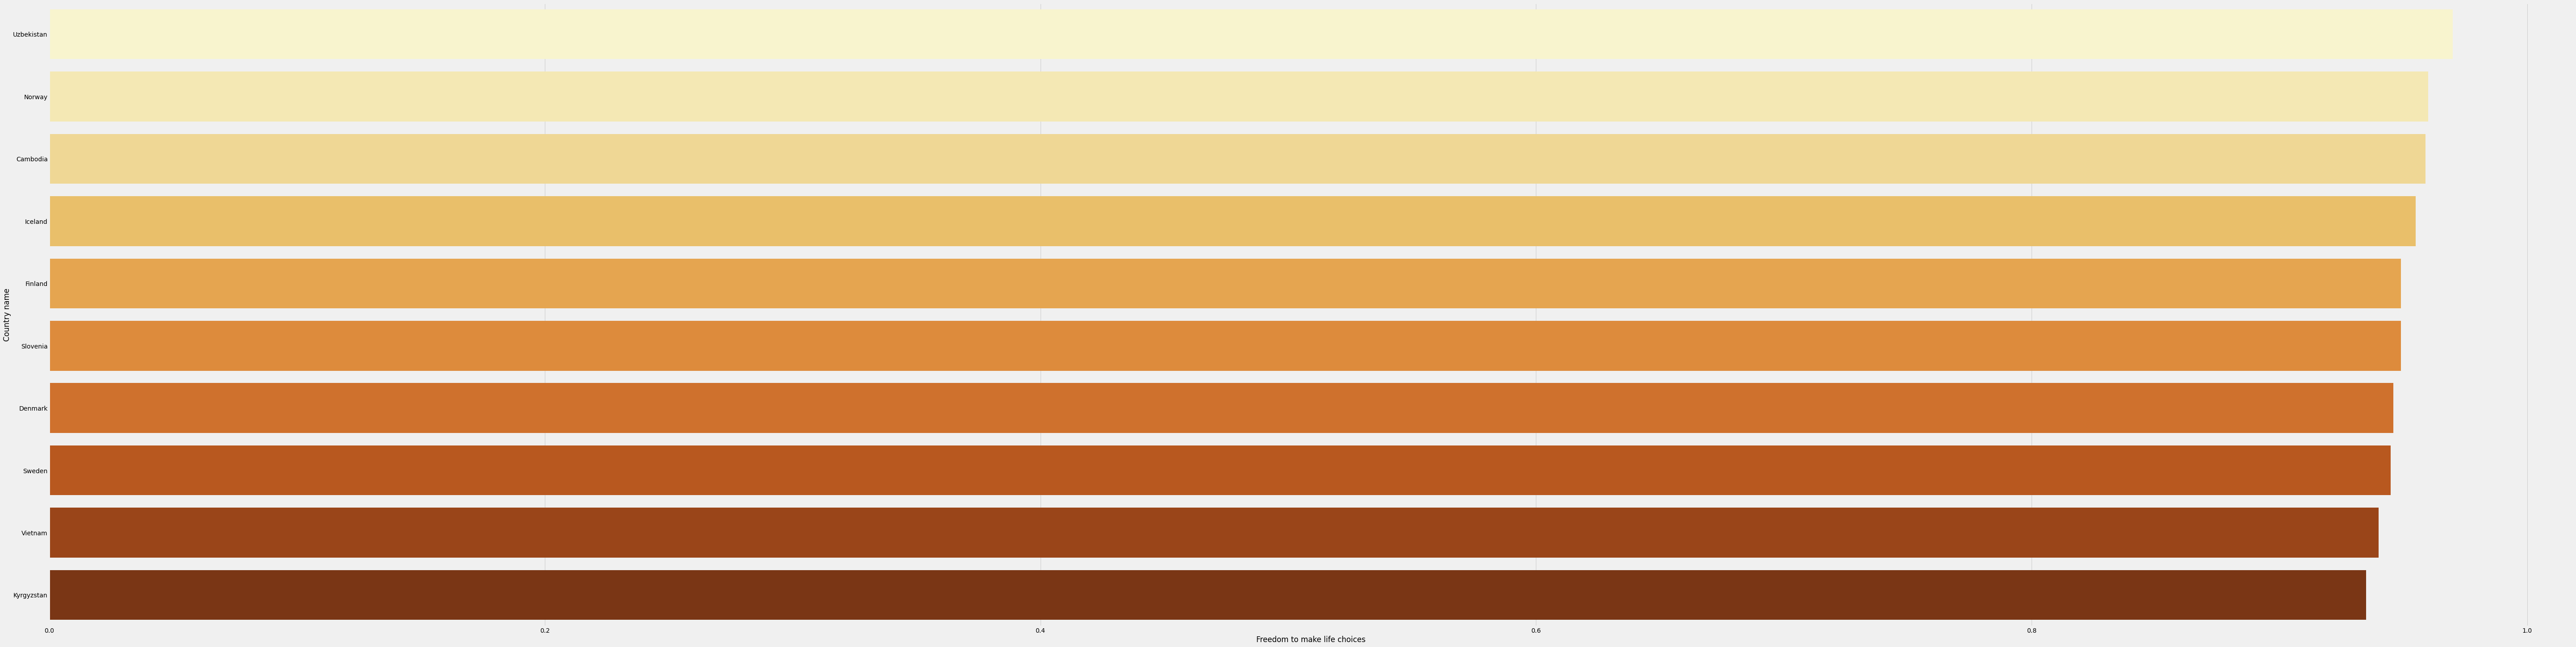

In [ ]:
fig, axes = plt.subplots(constrained_layout=True,figsize=(80,20))
sns.barplot(x='Freedom to make life choices' ,y='Country name',data=data2021.nlargest(10,'Freedom to make life choices'),palette='YlOrBr')

# about datawh

In [ ]:
datawh

Country name  year  ...  Positive affect  Negative affect
0     Afghanistan  2008  ...            0.518            0.258
1     Afghanistan  2009  ...            0.584            0.237
2     Afghanistan  2010  ...            0.618            0.275
3     Afghanistan  2011  ...            0.611            0.267
4     Afghanistan  2012  ...            0.710            0.268
...           ...   ...  ...              ...              ...
1944     Zimbabwe  2016  ...            0.738            0.209
1945     Zimbabwe  2017  ...            0.806            0.224
1946     Zimbabwe  2018  ...            0.710            0.212
1947     Zimbabwe  2019  ...            0.716            0.235
1948     Zimbabwe  2020  ...            0.703            0.346

[1949 rows x 11 columns]

## correlation of datawh

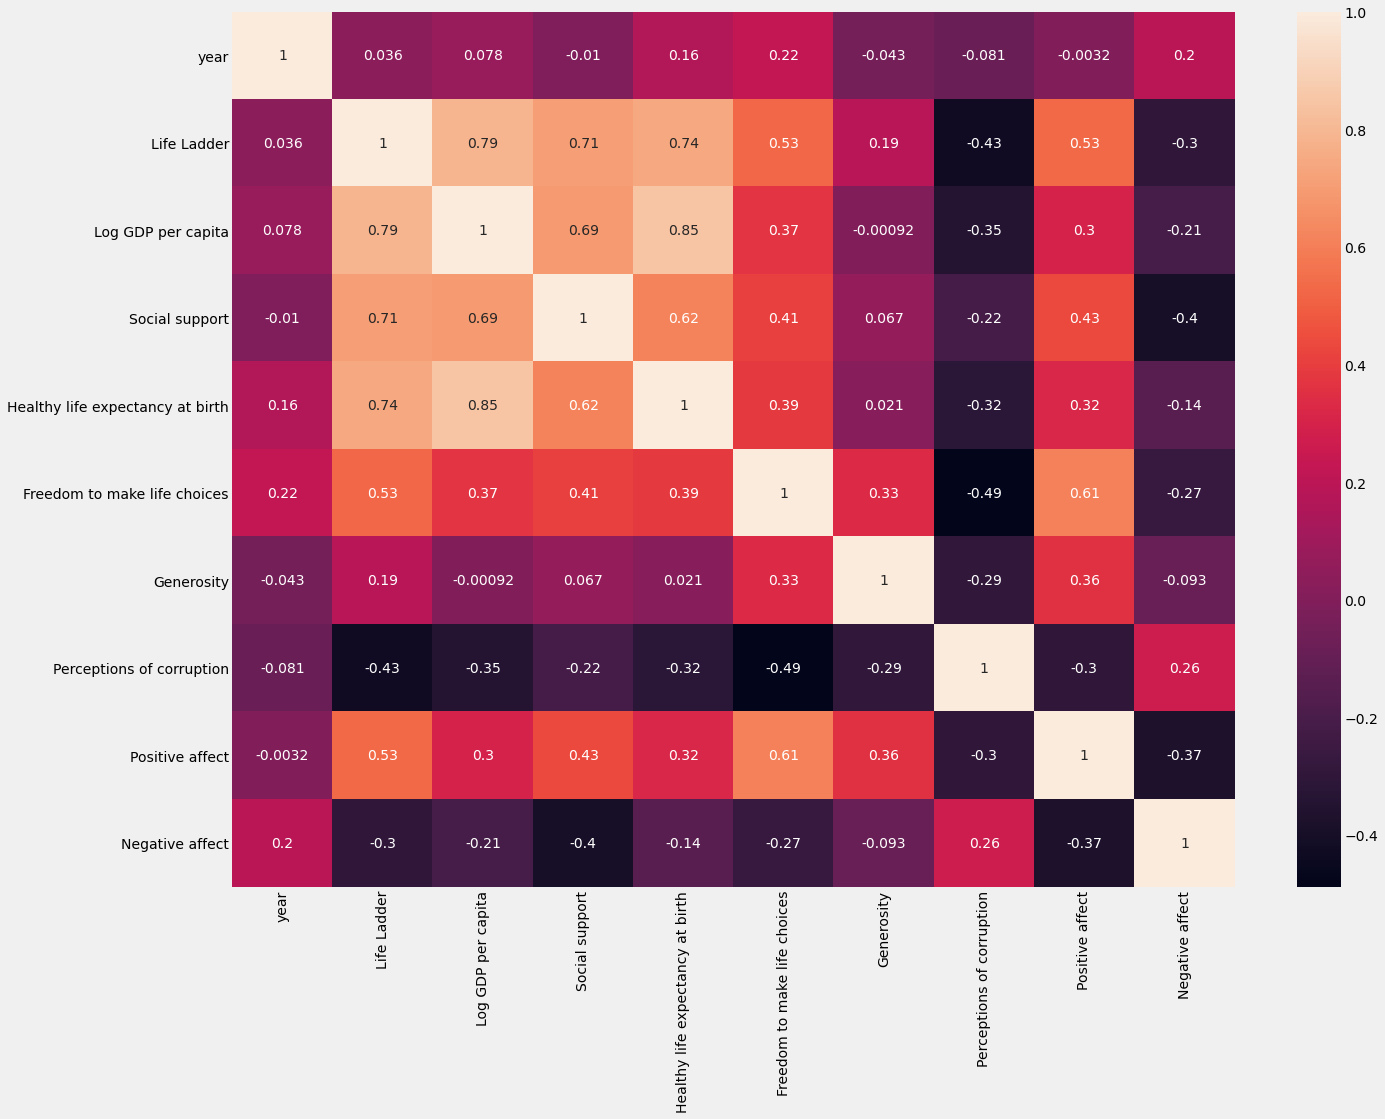

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(datawh.corr(), annot = True)

plt.show()

## Lets compare variables of datawh

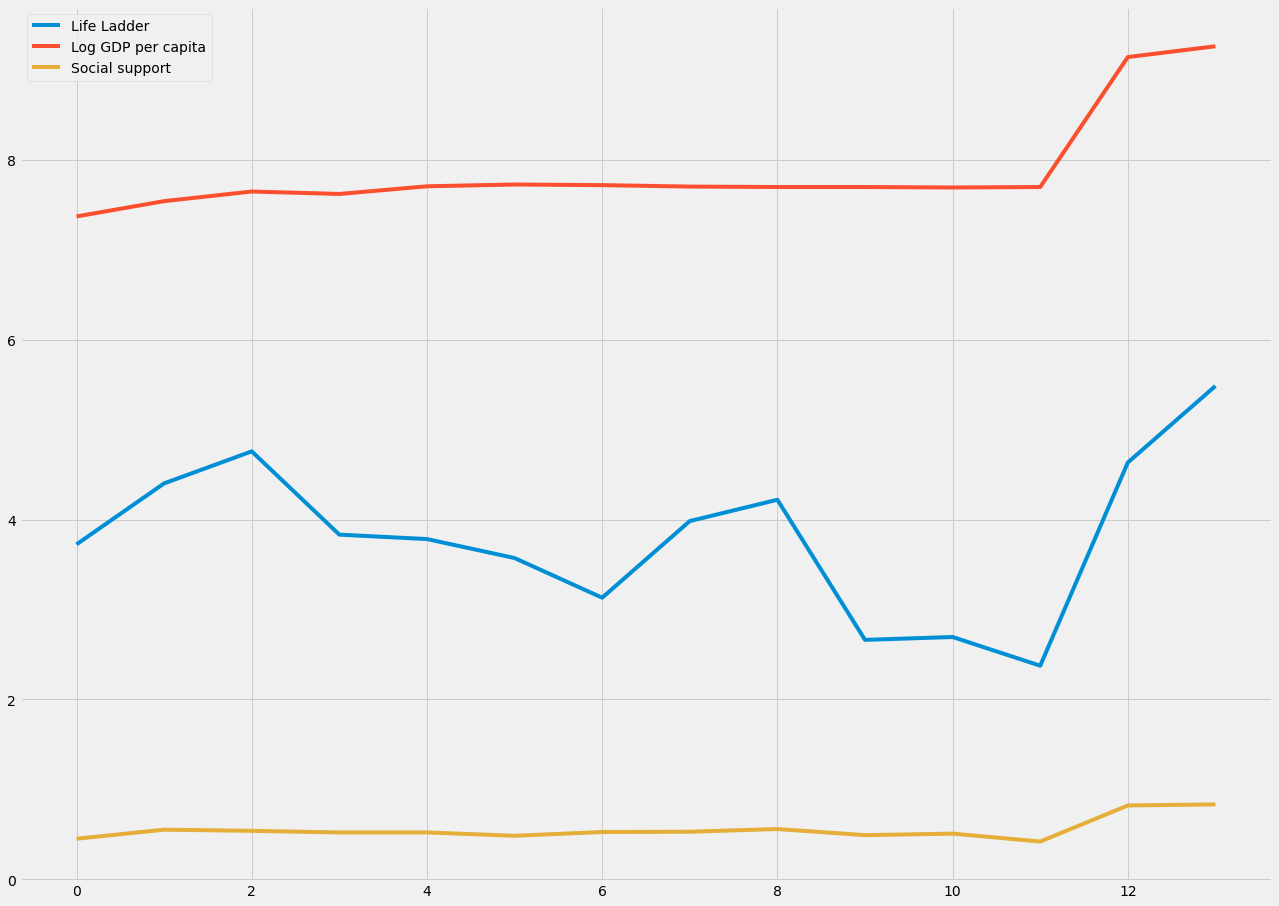

In [ ]:
data_plot = datawh.loc[:13,['Life Ladder','Log GDP per capita','Social support']]
data_plot.plot()

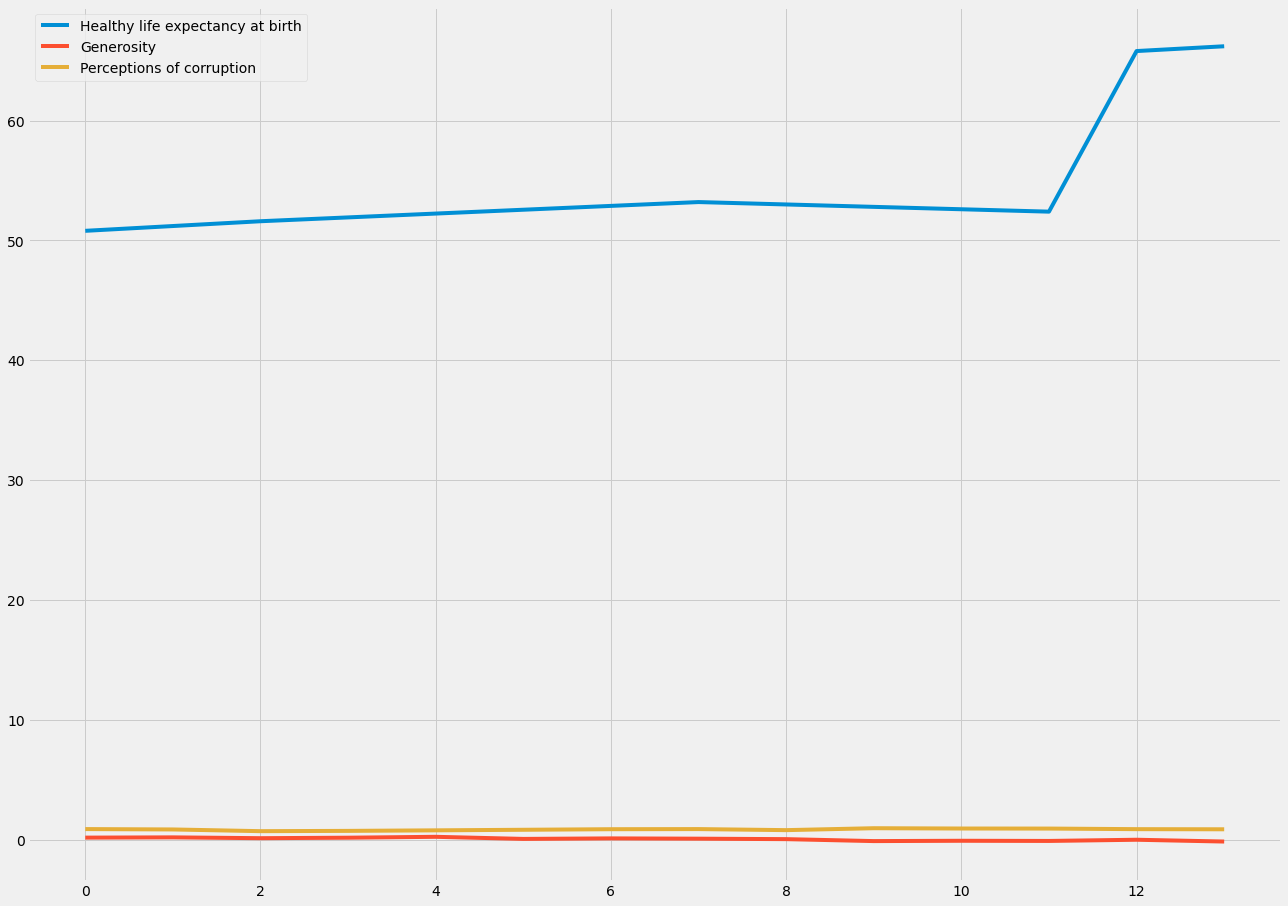

In [ ]:
data_plot = datawh.loc[:13,['Healthy life expectancy at birth','Generosity','Perceptions of corruption']]
data_plot.plot()

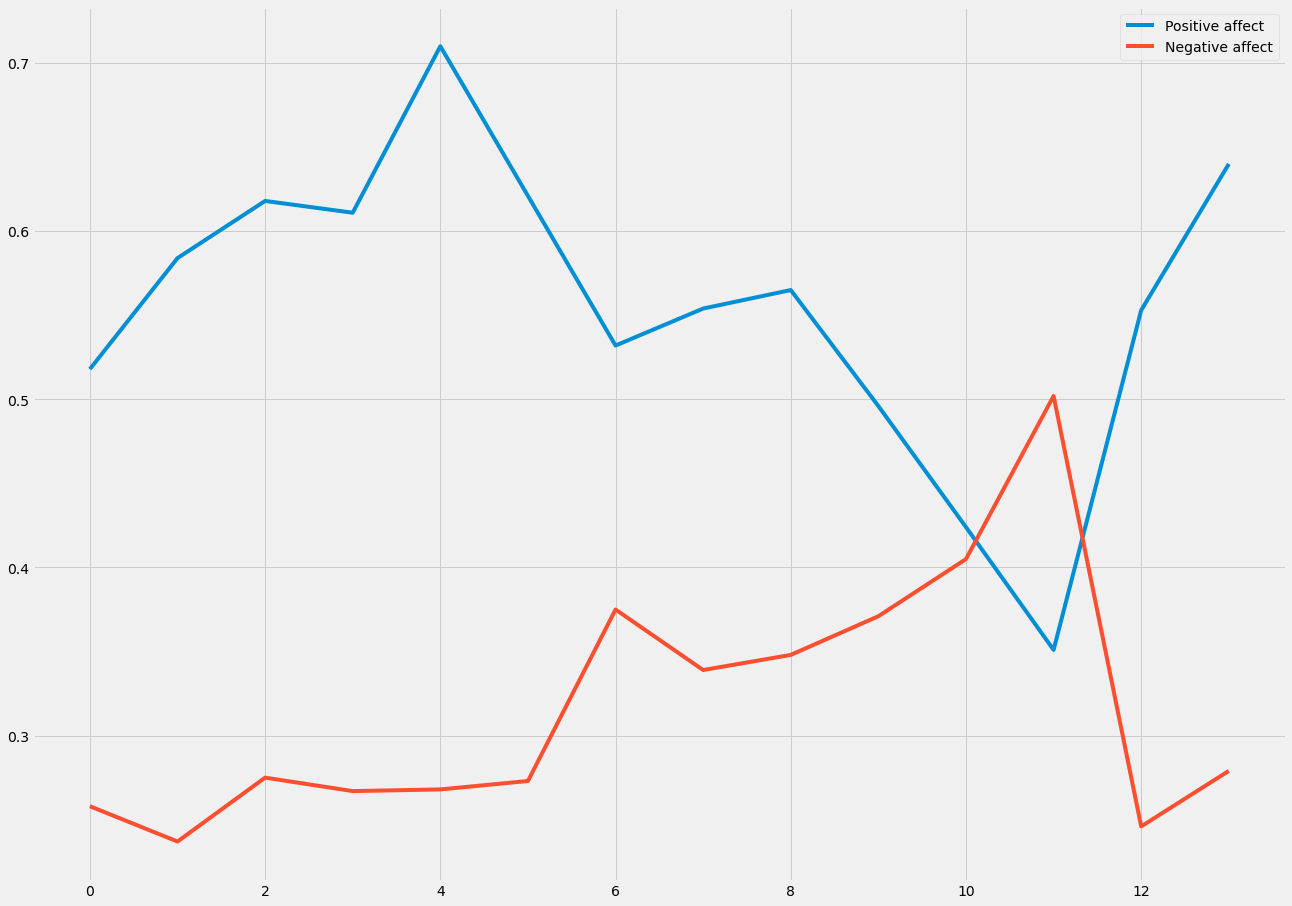

In [ ]:
data_plot = datawh.loc[:13,['Positive affect','Negative affect']]
data_plot.plot()